# FIT5196 Assessment 2

Student Name: Jaimon Thyparambil Thomas

Student ID: 29566428

Date:19-05-2019

Environment: Python 3.6.5 and Jupyter notebook Libraries used:

pandas (for using dataframes)

matplotlib.pyplot (for plots)

math (For various math functions)

networkx (For finding the shortest path)

numpy (for checking nan)

datetime (for checking weekday or weekend)

sklearn.model_selection and sklearn.linear_model (for prediction)

# Importing the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime

# Task 1: Data Cleansing

## Introduction

In this part of the assessment we will be using various ways to detect and clean given uber data

## Reading all necessary data into the DataFrame


In [2]:
dirtyData = pd.read_csv('29566428_dirty_data.csv')
missingData = pd.read_csv('29566428_missing_value.csv')
outlierData = pd.read_csv('29566428_outliers.csv')
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')

Dirty Data initially Looks Like

In [3]:
dirtyData.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3131303952,1,2,8,-37.820203,144.950883,-37.815834,145.046450,9025.0,2018-01-18,22:18:33,2605.14,23:01:58,25.40
1,ID1519026843,0,6,4,-37.773845,144.983689,-37.806914,144.998466,6199.0,2018-06-25,04:08:36,1338.30,4:30:54,11.24
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,2018-02-02,12:22:32,10410.12,15:16:02,55.60
3,ID5979102483,2,5,3,-37.816432,144.928439,-37.819126,144.981687,6070.0,2018-04-14,16:25:24,1402.98,16:48:46,141.42
4,ID1843939740,0,3,6,-37.822615,145.007229,-37.787442,144.980409,6049.0,2018-04-17,17:49:15,1528.44,18:14:43,8.84


In [4]:
dirtyData.columns

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

In [5]:
dirtyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 14 columns):
Unnamed: 0               305 non-null object
Uber Type                305 non-null int64
Origin Region            305 non-null int64
Destination Region       305 non-null int64
Origin Latitude          305 non-null float64
Origin Longitude         305 non-null float64
Destination Latitude     305 non-null float64
Destination Longitude    305 non-null float64
Journey Distance(m)      305 non-null float64
Departure Date           305 non-null object
Departure Time           305 non-null object
Travel Time(s)           305 non-null float64
Arrival Time             305 non-null object
Fare$                    305 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 33.4+ KB


### Uber Type

First we will analyse if there is any issues in the uber type

For that we will first start by looking what are the different values present in the uber type

In [6]:
dirtyData['Uber Type'].value_counts()

1    133
0    129
2     41
3      2
Name: Uber Type, dtype: int64

We already know that there are only 3 uber types so value 3 must have been an error. So lets analyse the value 3 further

In [7]:
dirtyData[dirtyData['Uber Type'] == 3]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
131,ID1422924139,3,9,5,-38.110916,144.654173,-37.809799,144.935966,42813.0,2018-01-11,11:28:36,10253.16,14:19:29,16.88
148,ID3855735758,3,8,5,-37.815834,145.046450,-37.801929,144.936790,10319.0,2018-04-22,12:17:29,2871.24,13:05:20,24.80


Now lets try to plot the entire data and check if we are able to understand any thing based on the plot

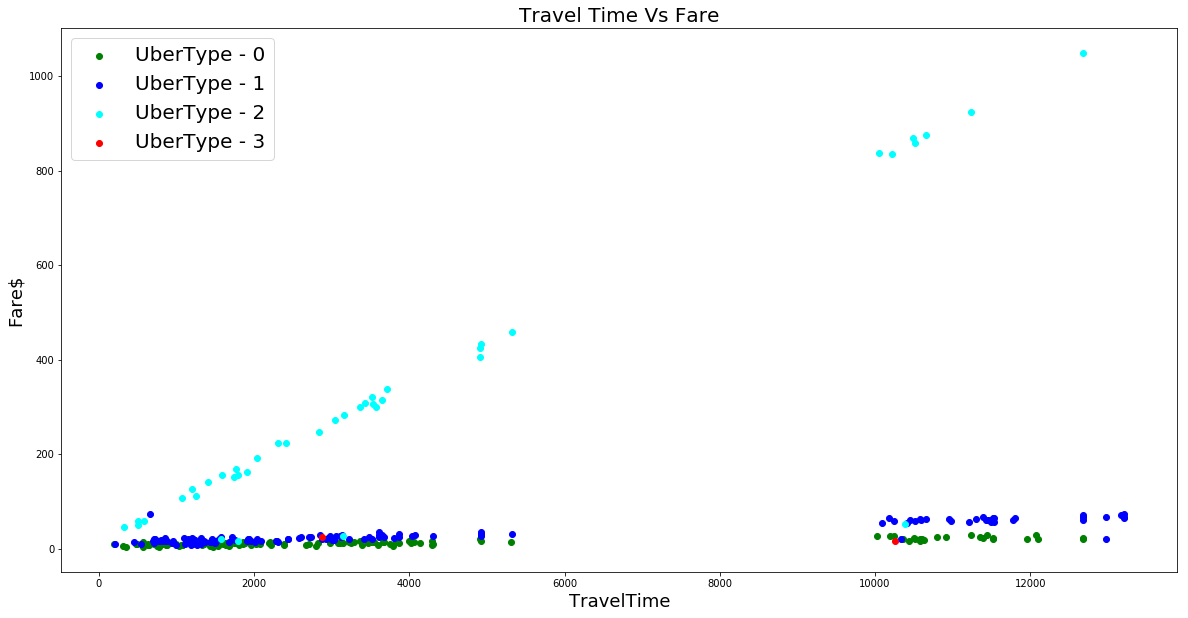

In [8]:
plt.figure(figsize=(20,10))
temp0 = dirtyData[dirtyData['Uber Type'] == 0]
temp1 = dirtyData[dirtyData['Uber Type'] == 1]
temp2 = dirtyData[dirtyData['Uber Type'] == 2]
temp3 = dirtyData[dirtyData['Uber Type'] == 3]

plt.scatter(temp0['Travel Time(s)'], temp0['Fare$'], color ='green' ,label = "UberType - 0")
plt.scatter(temp1['Travel Time(s)'], temp1['Fare$'], color ='blue' ,label = "UberType - 1")
plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='cyan' ,label = "UberType - 2")
plt.scatter(temp3['Travel Time(s)'], temp3['Fare$'], color ='red' ,label = "UberType - 3")

plt.xlabel('TravelTime', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

Here we can see that not just the entries with uber type 3. Even other entries seems to be overlapping.

In [9]:
dirtyData.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3131303952,1,2,8,-37.820203,144.950883,-37.815834,145.046450,9025.0,2018-01-18,22:18:33,2605.14,23:01:58,25.40
1,ID1519026843,0,6,4,-37.773845,144.983689,-37.806914,144.998466,6199.0,2018-06-25,04:08:36,1338.30,4:30:54,11.24
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,2018-02-02,12:22:32,10410.12,15:16:02,55.60
3,ID5979102483,2,5,3,-37.816432,144.928439,-37.819126,144.981687,6070.0,2018-04-14,16:25:24,1402.98,16:48:46,141.42
4,ID1843939740,0,3,6,-37.822615,145.007229,-37.787442,144.980409,6049.0,2018-04-17,17:49:15,1528.44,18:14:43,8.84


On looking the data it looks like the first 3 letters denotes the uber Type. SO inorder to Analyse the data lets extract the first 3 values and add it to a new column.

In [10]:
dirtyData['tempID'] = dirtyData['Unnamed: 0'].apply(lambda x: x[:3])

In [11]:
dirtyData['tempID'].value_counts()

ID3    135
ID1    132
ID5     38
Name: tempID, dtype: int64

In [12]:
dirtyData['Uber Type'][dirtyData['tempID'] == 'ID3'].value_counts()

1    130
2      4
3      1
Name: Uber Type, dtype: int64

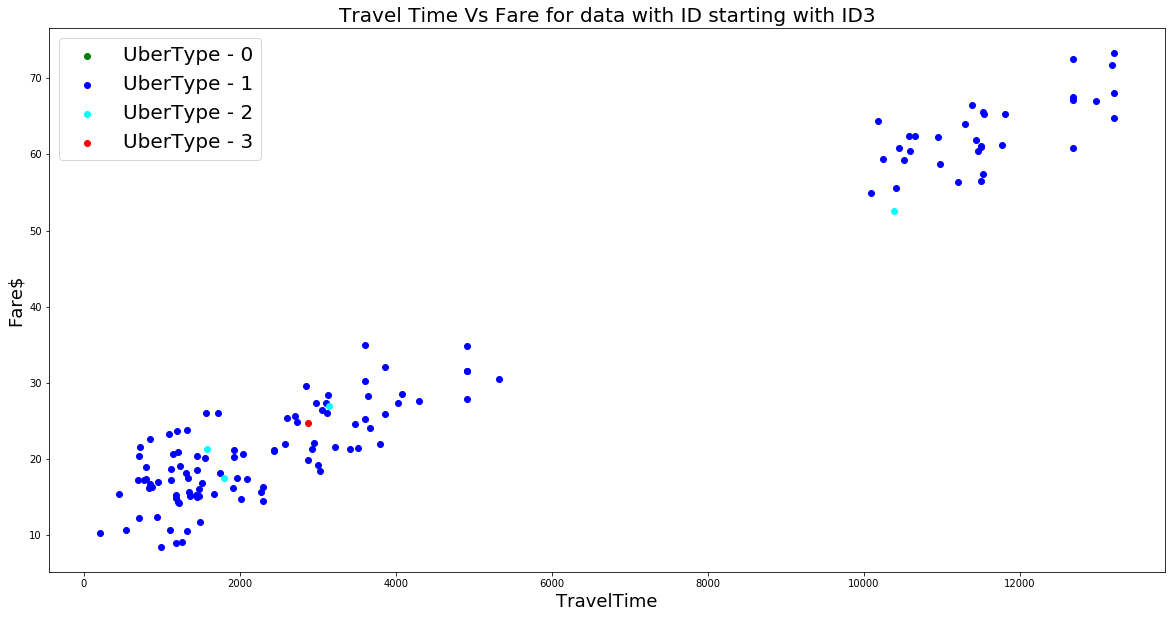

In [13]:
plt.figure(figsize=(20,10))
temp = dirtyData[dirtyData['tempID'] == 'ID3']
temp0 = temp[temp['Uber Type'] == 0]
temp1 = temp[temp['Uber Type'] == 1]
temp2 = temp[temp['Uber Type'] == 2]
temp3 = temp[temp['Uber Type'] == 3]

plt.scatter(temp0['Travel Time(s)'], temp0['Fare$'], color ='green' ,label = "UberType - 0")
plt.scatter(temp1['Travel Time(s)'], temp1['Fare$'], color ='blue' ,label = "UberType - 1")
plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='cyan' ,label = "UberType - 2")
plt.scatter(temp3['Travel Time(s)'], temp3['Fare$'], color ='red' ,label = "UberType - 3")
plt.xlabel('TravelTime', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare for data with ID starting with ID3', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

From the plot and the values it is pretty much clear that the IDs starting with ID3 represents uber type 1

In [14]:
dirtyData['Uber Type'][dirtyData['tempID'] == 'ID1'].value_counts()

0    129
1      2
3      1
Name: Uber Type, dtype: int64

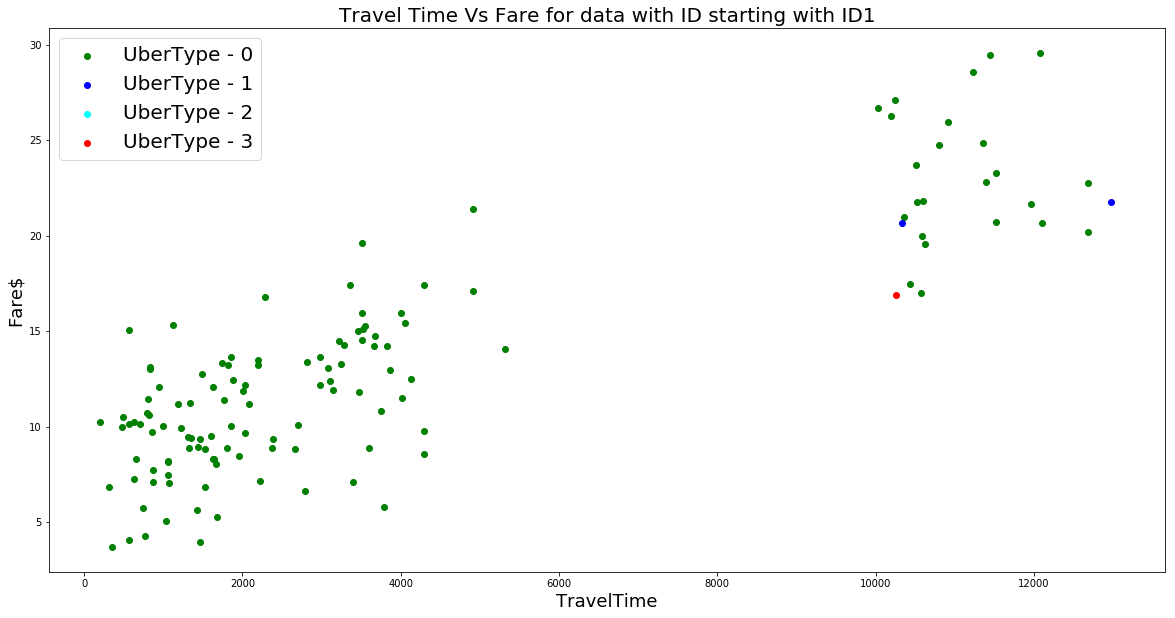

In [15]:
plt.figure(figsize=(20,10))
temp = dirtyData[dirtyData['tempID'] == 'ID1']
temp0 = temp[temp['Uber Type'] == 0]
temp1 = temp[temp['Uber Type'] == 1]
temp2 = temp[temp['Uber Type'] == 2]
temp3 = temp[temp['Uber Type'] == 3]

plt.scatter(temp0['Travel Time(s)'], temp0['Fare$'], color ='green' ,label = "UberType - 0")
plt.scatter(temp1['Travel Time(s)'], temp1['Fare$'], color ='blue' ,label = "UberType - 1")
plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='cyan' ,label = "UberType - 2")
plt.scatter(temp3['Travel Time(s)'], temp3['Fare$'], color ='red' ,label = "UberType - 3")
plt.xlabel('TravelTime', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare for data with ID starting with ID1', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

From the plot and the values it is pretty much clear that the IDs starting with ID1 represents uber type 0

In [16]:
dirtyData['Uber Type'][dirtyData['tempID'] == 'ID5'].value_counts()

2    37
1     1
Name: Uber Type, dtype: int64

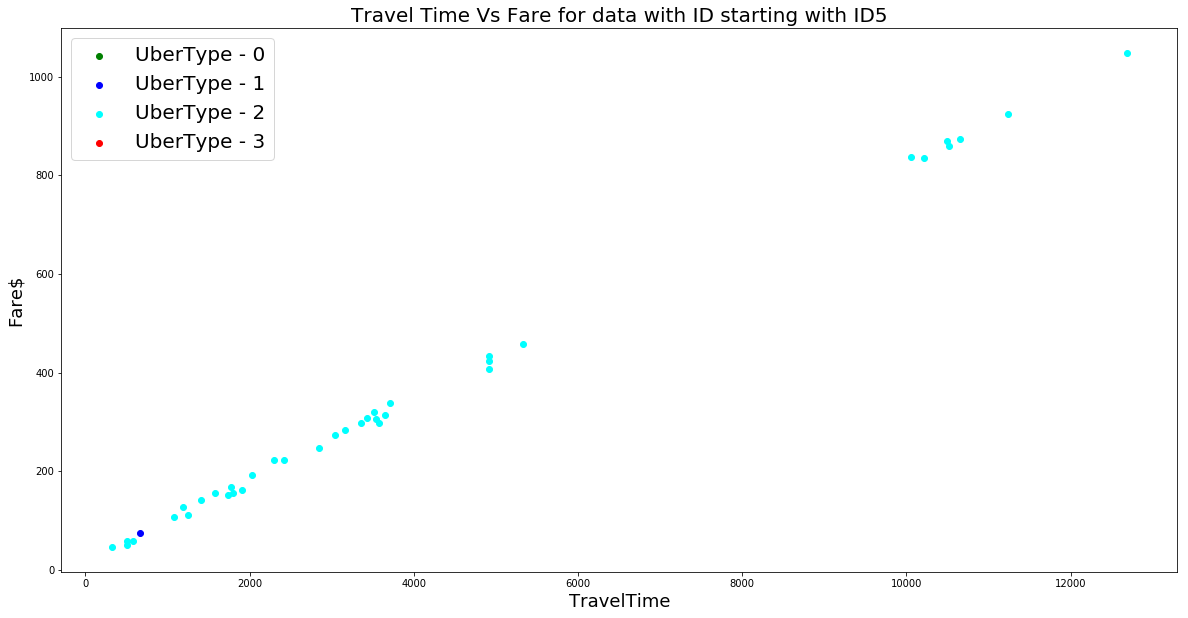

In [17]:
plt.figure(figsize=(20,10))
temp = dirtyData[dirtyData['tempID'] == 'ID5']
temp0 = temp[temp['Uber Type'] == 0]
temp1 = temp[temp['Uber Type'] == 1]
temp2 = temp[temp['Uber Type'] == 2]
temp3 = temp[temp['Uber Type'] == 3]

plt.scatter(temp0['Travel Time(s)'], temp0['Fare$'], color ='green' ,label = "UberType - 0")
plt.scatter(temp1['Travel Time(s)'], temp1['Fare$'], color ='blue' ,label = "UberType - 1")
plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='cyan' ,label = "UberType - 2")
plt.scatter(temp3['Travel Time(s)'], temp3['Fare$'], color ='red' ,label = "UberType - 3")
plt.xlabel('TravelTime', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare for data with ID starting with ID5', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

From the plot and the values it is pretty much clear that the IDs starting with ID5 represents uber type 2

From these figures it is pretty much clear that the ubertype is actualy calculated using the ID's first 3 letters. So lets fix the values that doesnt match this criteria

In [18]:
dirtyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 15 columns):
Unnamed: 0               305 non-null object
Uber Type                305 non-null int64
Origin Region            305 non-null int64
Destination Region       305 non-null int64
Origin Latitude          305 non-null float64
Origin Longitude         305 non-null float64
Destination Latitude     305 non-null float64
Destination Longitude    305 non-null float64
Journey Distance(m)      305 non-null float64
Departure Date           305 non-null object
Departure Time           305 non-null object
Travel Time(s)           305 non-null float64
Arrival Time             305 non-null object
Fare$                    305 non-null float64
tempID                   305 non-null object
dtypes: float64(7), int64(3), object(5)
memory usage: 35.8+ KB


In [19]:
uberTypeErrorIDs = []
def uberTypeFix(val):
    if(val['tempID'] == 'ID1'):
        if(val['Uber Type']!=0):
            uberTypeErrorIDs.append(val['Unnamed: 0'])
        return 0
    elif(val['tempID'] == 'ID3'):
        if(val['Uber Type']!=1):
            uberTypeErrorIDs.append(val['Unnamed: 0'])
        return 1
    elif(val['tempID'] == 'ID5'):
        if(val['Uber Type']!=2):
            uberTypeErrorIDs.append(val['Unnamed: 0'])
        return 2

In [20]:
dirtyData['Uber Type'] = dirtyData.apply(uberTypeFix,axis = 1)

In [21]:
uberTypeErrorIDs

['ID3384558804',
 'ID1422924139',
 'ID3782087780',
 'ID5518414299',
 'ID1158542879',
 'ID1227930947',
 'ID3822412452',
 'ID3721136865',
 'ID3855735758']

We already know that in a particular row ony one error occurs so lets maintain the no of errorIDs So that we can keep track of it

In [22]:
errorList = []
errorList += (list(set(uberTypeErrorIDs)))

In [23]:
len(errorList)

9

Now lets Cross validate wheather all the issues in the values of ubertype is been fixed or not

In [24]:
dirtyData[dirtyData['Uber Type'] == 3]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID


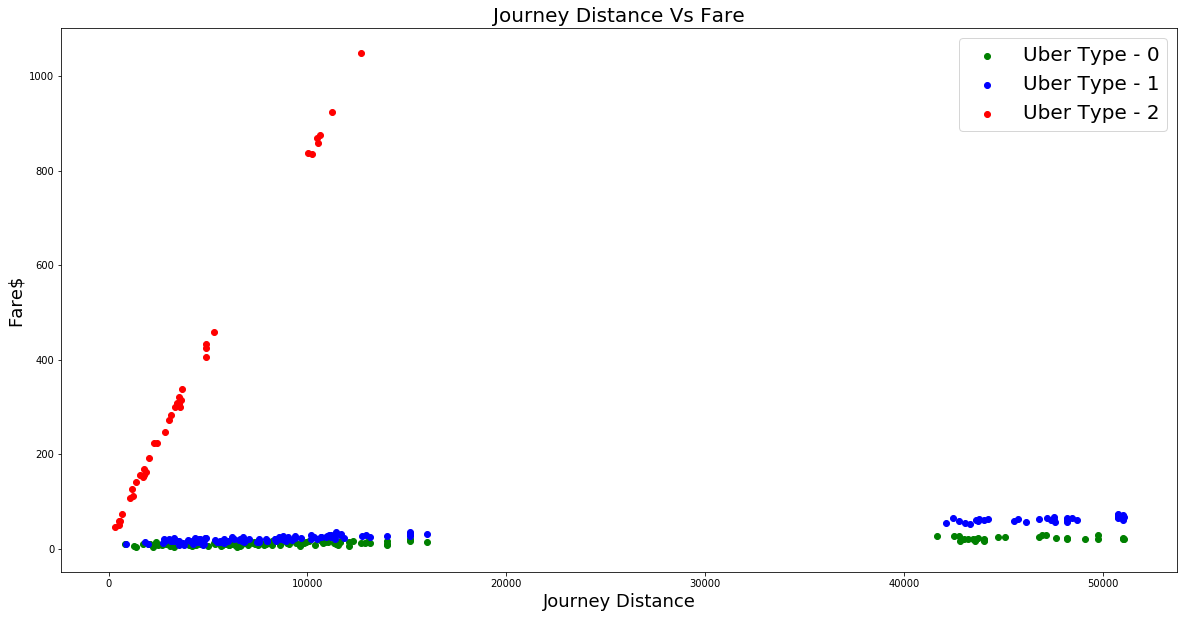

In [25]:
plt.figure(figsize=(20,10))
temp0 = dirtyData[dirtyData['Uber Type'] == 0]
temp1 = dirtyData[dirtyData['Uber Type'] == 1]
temp2 = dirtyData[dirtyData['Uber Type'] == 2]

plt.scatter(temp0['Journey Distance(m)'], temp0['Fare$'], color ='green' ,label = "Uber Type - 0")
plt.scatter(temp1['Journey Distance(m)'], temp1['Fare$'], color ='blue' ,label = "Uber Type - 1")
plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='red' ,label = "Uber Type - 2")
plt.xlabel('Journey Distance', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Journey Distance Vs Fare', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

Now it looks like all the issues in uber Type iss been fixed to lets go to the next field

### Origin and Destination Latitude

Now lets analyse if there is any issues in the origin and destination latitude values

First lets try to pot a box pot of these values and check if there is any outliers

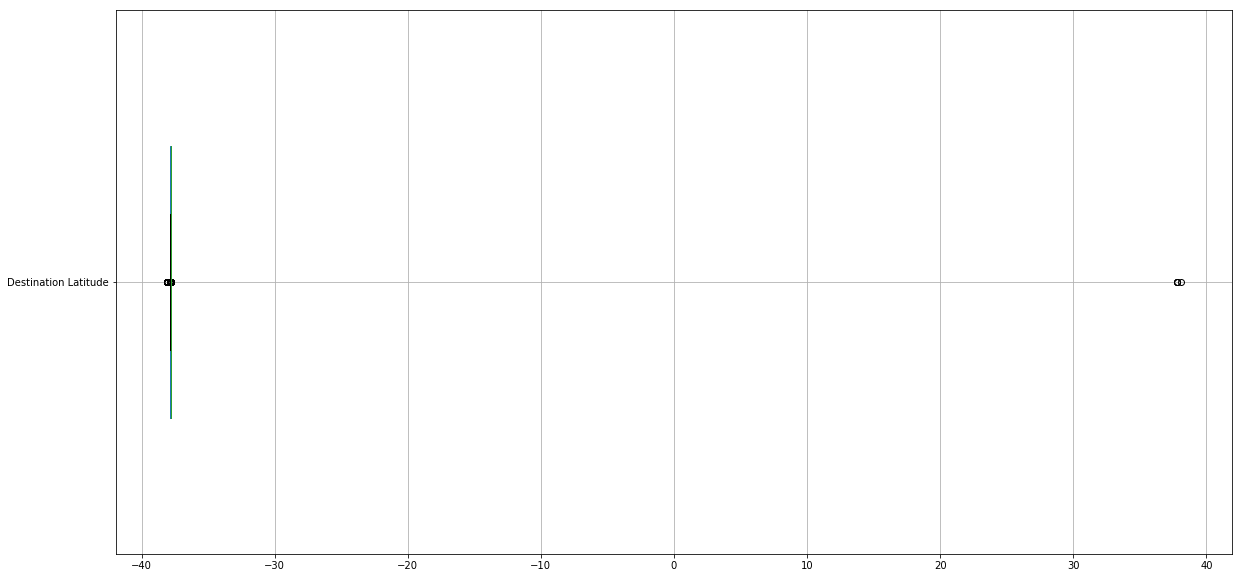

In [26]:
plt.figure(figsize=(20,10))
dirtyData.boxplot(column = 'Destination Latitude',vert=False,figsize=(20,12),widths = .5)
plt.show()

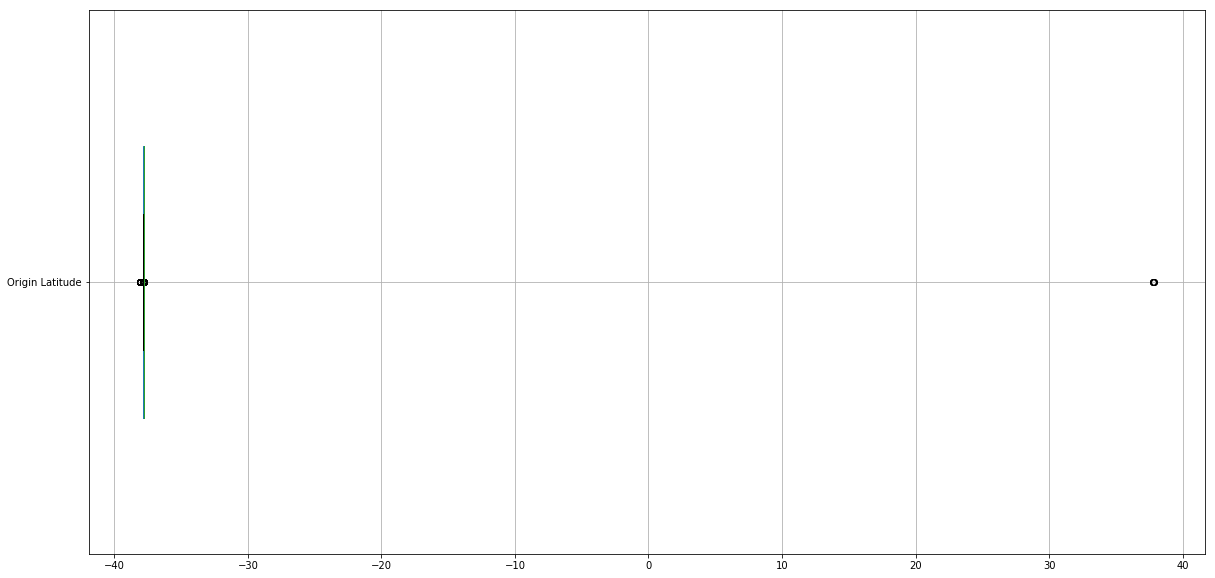

In [27]:
plt.figure(figsize=(20,10))
dirtyData.boxplot(column = 'Origin Latitude',vert=False,figsize=(20,12),widths = .5)
plt.show()

we can see that in both origin and destination the there are some +ve values which looks like outliers

In [28]:
dirtyData[dirtyData['Destination Latitude'] > 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID
69,ID3375003489,1,2,3,-37.819723,144.946810,37.822306,144.996736,4918.0,2018-05-06,00:51:50,1194.84,1:11:44,23.66,ID3
71,ID5198111718,2,7,2,-37.861835,144.905716,37.815239,144.936436,10481.0,2018-04-18,02:03:28,3432.66,3:00:40,307.95,ID5
72,ID1348170568,0,5,9,-37.801350,144.937552,38.110916,144.654173,44039.0,2018-04-26,06:02:45,10575.84,8:59:00,17.02,ID1
76,ID1253580195,0,1,5,-37.807889,144.973039,37.809311,144.929669,4745.0,2018-05-24,14:16:34,1224.42,14:36:58,9.93,ID1
77,ID1847012773,0,5,6,-37.799817,144.936247,37.773845,144.983689,6436.0,2018-06-05,09:00:47,1464.06,9:25:11,3.95,ID1


From the above data we can see that these destination latitude values must have been -ve since its origin latitude values are   -ve and its travel distance is not that high for it to travel from a region of -ve latitude to +ve latitude region.So those value is been fixed

In [29]:
destinationIDs = list(dirtyData['Unnamed: 0'][dirtyData['Destination Latitude'] > 0])
destinationIDs

['ID3375003489',
 'ID5198111718',
 'ID1348170568',
 'ID1253580195',
 'ID1847012773']

In [30]:
#function used to check whether an error has occured before or not
def idsInErrorList(newList):
    for each in newList:
        if each in errorList:
            return True
    return False

In [31]:
idsInErrorList(destinationIDs)

False

In [32]:
errorList += destinationIDs

In [33]:
dirtyData[dirtyData['Origin Latitude'] > 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID
58,ID1322809808,0,5,2,37.815750,144.921556,-37.824437,144.942542,4192.0,2018-06-02,11:26:59,1063.38,11:44:42,8.20,ID1
59,ID1870198994,0,7,6,37.861835,144.905716,-37.787442,144.980409,11630.0,2018-01-22,05:11:53,3678.54,6:13:11,14.77,ID1
60,ID1566212454,0,1,5,37.820734,144.948821,-37.805257,144.933754,2476.0,2018-06-28,18:00:30,628.44,18:10:58,7.27,ID1
62,ID1585792707,0,1,2,37.799790,144.965651,-37.819248,144.946401,3405.0,2018-01-08,01:40:03,855.90,1:54:18,9.72,ID1
67,ID5390961998,2,8,7,37.815834,145.046450,-37.861835,144.905716,15151.0,2018-07-08,02:20:19,4917.48,3:42:16,433.31,ID5


Similary From the above data we can see that these origin latitude values must have been -ve since its destination latitude values are +ve and its travel distance is not that high for it to travel from a region of -ve latitude to +ve latitude region.So those value are been fixed

In [34]:
originIDs = list(dirtyData['Unnamed: 0'][dirtyData['Origin Latitude'] > 0])
originIDs

['ID1322809808',
 'ID1870198994',
 'ID1566212454',
 'ID1585792707',
 'ID5390961998']

In [35]:
idsInErrorList(originIDs)

False

In [36]:
errorList += originIDs

In [37]:
len(errorList)

19

Now lets fix the values of those latitudes by converting its values to respective -ve value

In [38]:
dirtyData['Origin Latitude'] = dirtyData['Origin Latitude'].apply(lambda x: -abs(x))
dirtyData['Destination Latitude'] = dirtyData['Destination Latitude'].apply(lambda x: -abs(x))

Now lets cross validate if the values of latitude are fixed or not

In [39]:
dirtyData[dirtyData['Origin Latitude'] > 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID


In [40]:
dirtyData[dirtyData['Destination Latitude'] > 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID


Looks like all the errors in the latitude is been fixed

### Origin and Destination Longitude

Now lets analyse if there is any issues in the origin or destination longitude values

In [41]:
dirtyData.columns

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$', 'tempID'],
      dtype='object')

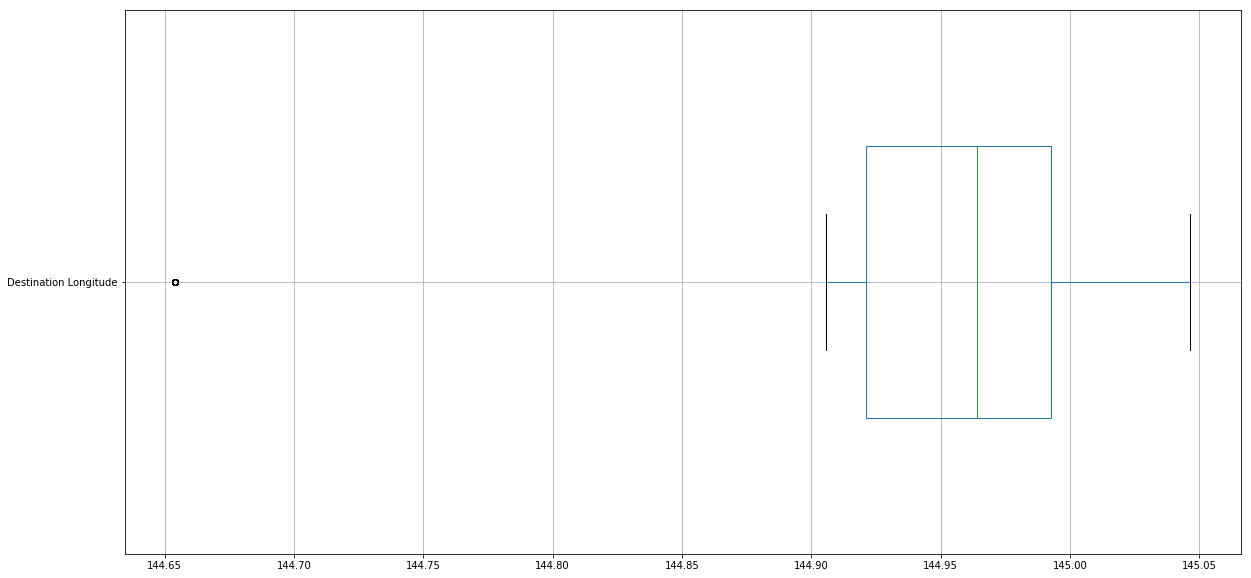

In [42]:
plt.figure(figsize=(20,10))
dirtyData.boxplot(column = 'Destination Longitude',vert=False,figsize=(20,12),widths = .5)
plt.show()

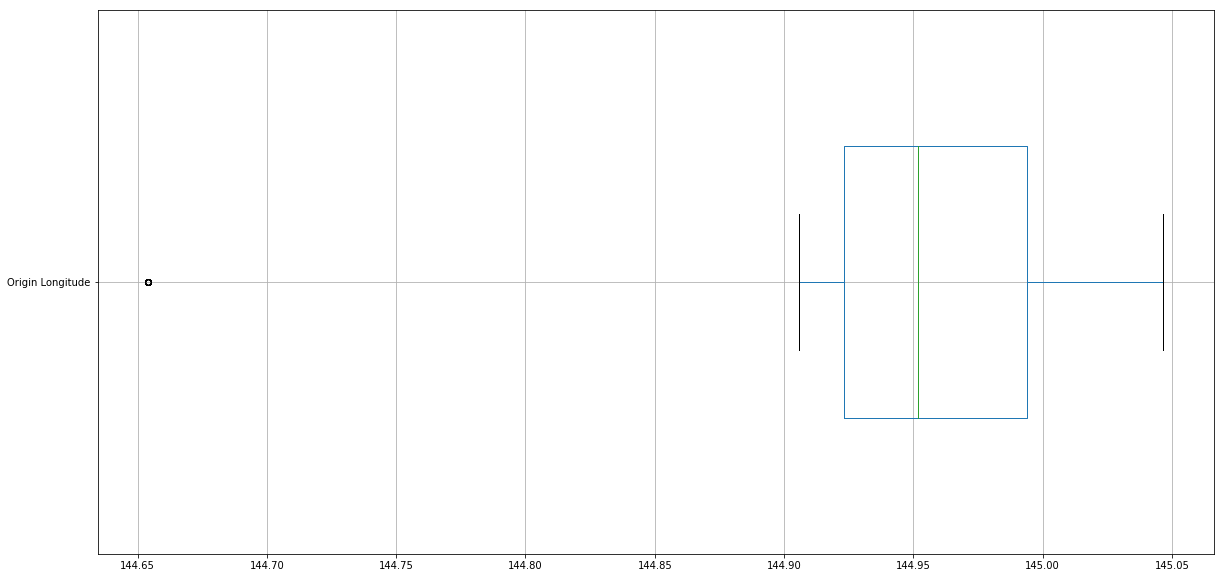

In [43]:
plt.figure(figsize=(20,10))
dirtyData.boxplot(column = 'Origin Longitude',vert=False,figsize=(20,12),widths = .5)
plt.show()

we can see that in both origin and destination the there are some values less than 144.70 which looks like outliers. So lets analyse those values

In [44]:
dirtyData[dirtyData['Destination Longitude'] <144.70]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID
18,ID5983429879,2,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-01-15,02:39:00,12681.06,6:10:21,1048.23,ID5
19,ID1474382797,0,5,9,-37.806489,144.932921,-38.110916,144.654173,43579.0,2018-05-10,06:05:28,10436.22,8:59:24,17.47,ID1
21,ID3958086729,1,4,9,-37.804842,144.993481,-38.110916,144.654173,46805.0,2018-04-14,14:32:06,11300.34,17:40:26,63.95,ID3
29,ID3977511855,1,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-07-10,14:08:13,12681.06,17:39:34,67.49,ID3
40,ID1607872908,0,6,9,-37.773845,144.983689,-38.110916,144.654173,48197.0,2018-07-06,19:24:49,11519.40,22:36:48,20.69,ID1
43,ID3938261370,1,4,9,-37.804384,144.930085,-38.110916,144.654173,44023.0,2018-03-21,22:13:29,10589.70,1:09:58,60.43,ID3
63,ID1948816512,0,5,9,-37.801346,144.917442,-38.110916,144.654173,45115.0,2018-01-11,23:06:25,10908.24,2:08:13,25.93,ID1
72,ID1348170568,0,5,9,-37.801350,144.937552,-38.110916,144.654173,44039.0,2018-04-26,06:02:45,10575.84,8:59:00,17.02,ID1
78,ID3891892639,1,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-07-23,01:41:46,13173.36,5:21:19,71.72,ID3
122,ID3182945996,1,4,9,-37.802783,145.002151,-38.110916,144.654173,47615.0,2018-04-13,08:23:13,11530.56,14:26:39,57.49,ID3


In [45]:
dirtyData[dirtyData['Origin Longitude'] <144.70]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,2018-02-02,12:22:32,10410.12,15:16:02,55.60,ID3
25,ID3492327497,1,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-06-14,06:21:38,13204.98,10:01:42,64.80,ID3
35,ID3871459196,1,9,3,-38.110916,144.654173,-37.816198,145.007399,47581.0,2018-04-17,19:41:29,11431.80,22:52:00,61.85,ID3
54,ID1947824171,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-01-10,06:11:40,12099.66,9:33:19,20.65,ID1
55,ID3258659494,1,9,3,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-03-09,06:26:51,12681.06,9:58:12,60.83,ID3
73,ID3430654677,1,9,6,-38.110916,144.654173,-37.773845,144.983689,48197.0,2018-04-11,09:54:23,11495.34,13:05:58,56.56,ID3
82,ID1444921867,0,9,5,-38.110916,144.654173,-37.810014,144.936075,42791.0,2018-07-01,01:23:29,10247.46,4:14:16,27.08,ID1
83,ID5482216292,2,9,3,-38.110916,144.654173,-37.817664,144.970528,44046.0,2018-07-20,18:05:13,10653.40,21:02:03,874.70,ID5
93,ID5207439659,2,9,5,-38.110916,144.654173,-37.806503,144.932213,43543.0,2018-06-28,15:13:37,10512.90,18:07:25,858.64,ID5
95,ID3661021817,1,9,6,-38.110916,144.654173,-37.773845,144.983689,48197.0,2018-06-17,10:44:50,11495.34,13:56:25,60.92,ID3


These values looks like valid values only so looks like there is no issue in origin or destination Longitude

### Departure Date

Now lets analyse the departure date in detail

In [46]:
dirtyData['year'] = dirtyData['Departure Date'].apply(lambda x: x.split('-')[0])
dirtyData['month'] = dirtyData['Departure Date'].apply(lambda x: x.split('-')[1])
dirtyData['day'] = dirtyData['Departure Date'].apply(lambda x: x.split('-')[2])

In [47]:
dirtyData['year'].value_counts()

2018    305
Name: year, dtype: int64

In [48]:
dirtyData['month'].value_counts()

04    53
06    46
03    45
02    43
01    37
07    37
05    37
27     2
15     1
22     1
17     1
21     1
16     1
Name: month, dtype: int64

From the vaues for month we can see that some of the values of the moths are greater than 12 which is not possible hence it must have been an error.

So lets fix this by checking whether in cases where the month value was greater than 12 whether the repective days value is less than 12. If thats the case then we can assume that those values might have been swapped by mistake and we can fix those cases

In [49]:
dateSwapIds = []
#function used to values of day and month in date 
#if the months vaues is > 12 and days values in < 12
def fixDate(val):
    date = val['Departure Date'].split('-')
    if(int(date[1])>12 and int(date[2])<12):
        dateSwapIds.append(val['Unnamed: 0'])
        return date[0]+'-'+date[2]+'-'+date[1]
    return val['Departure Date']

In [50]:
dirtyData['Departure Date'] = dirtyData.apply(fixDate,axis=1)

In [51]:
len(dateSwapIds)

7

This shows that there we around 7 such cases. 

In [52]:
idsInErrorList(dateSwapIds)

False

In [53]:
errorList += dateSwapIds

In [54]:
len(errorList)

26

In [55]:
dirtyData['month'] = dirtyData['Departure Date'].apply(lambda x: x.split('-')[1])
dirtyData['month'].value_counts()

04    54
06    47
03    45
02    45
01    40
07    37
05    37
Name: month, dtype: int64

In [56]:
dirtyData['day'].value_counts()

22    18
15    16
11    15
02    13
21    13
14    13
20    12
16    12
24    12
23    12
08    11
01    11
09    10
19    10
10    10
26    10
04    10
18    10
06    10
25    10
17     9
05     9
12     8
27     8
03     7
07     6
30     6
13     5
28     5
31     4
Name: day, dtype: int64

Now lets check if the values of dates > 28 are proper or not

In [57]:
dirtyData[dirtyData['day'] == '29']

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,year,month,day


In [58]:
dirtyData[dirtyData['day'] == '30']

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,year,month,day
212,ID1281520805,0,2,5,-37.817898,144.948546,-37.799659,144.924813,3397.0,2018-02-30,14:08:24,814.98,14:21:58,10.61,ID1,2018,02,30
215,ID1552702443,0,5,4,-37.805952,144.933511,-37.803611,145.005769,7034.0,2018-02-30,15:15:54,1821.66,15:46:15,13.21,ID1,2018,02,30
220,ID3412442478,1,8,5,-37.815834,145.046450,-37.812091,144.927673,11096.0,2018-02-30,03:52:21,3112.02,4:44:13,27.36,ID3,2018,02,30
223,ID3277280378,1,2,9,-37.812840,144.943092,-38.110916,144.654173,42104.0,2018-02-30,16:07:08,10087.38,18:55:15,54.98,ID3,2018,02,30
230,ID1567411583,0,2,8,-37.813015,144.940696,-37.815834,145.046450,9655.0,2018-02-30,13:54:14,2700.96,14:39:14,10.11,ID1,2018,02,30
233,ID1153511572,0,9,5,-38.110916,144.654173,-37.805863,144.936667,43227.0,2018-02-30,19:11:41,10358.16,22:04:19,20.95,ID1,2018,02,30


In [59]:
errorDates = list(dirtyData['Unnamed: 0'][dirtyData['day'] == '30'])

In [60]:
dirtyData[dirtyData['day'] == '31']

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,year,month,day
213,ID3543428925,1,7,5,-37.861835,144.905716,-37.806830,144.937811,10470.0,2018-06-31,11:33:04,3409.20,12:29:53,21.39,ID3,2018,06,31
216,ID1565838233,0,3,7,-37.808400,144.994032,-37.861835,144.905716,10652.0,2018-04-31,23:24:48,3514.98,0:23:22,19.61,ID1,2018,04,31
232,ID1451787335,0,4,3,-37.804716,144.999819,-37.810090,144.978581,2914.0,2018-04-31,20:20:21,704.34,20:32:05,10.12,ID1,2018,04,31
238,ID3603635925,1,3,7,-37.824694,144.988973,-37.861835,144.905716,9239.0,2018-06-31,06:34:03,3023.88,7:24:26,18.44,ID3,2018,06,31


In [61]:
errorDates += list(dirtyData['Unnamed: 0'][dirtyData['day'] == '31'])

In [62]:
idsInErrorList(errorDates)

False

In [63]:
errorList += errorDates

IN the above cases that we can see that in the month February(02) in year 2018 the maximum value is actually 28 but he value given here is 30. So we will assume that they day that they actualy meant was 28 and replace those values with 28. Similarly for months April(04) and June(06) the maximum value for day is 30 but here the value provided is 31 so we will assume that they actually meant 30 and replace those values with 30

In [64]:
#function used to set the value of day to 28 if its greater than 28 for Feb
#similarly it also changes the days to 30 for months with max value of date 30
#but here the value given is greater than 30
def fixDateMonthAndDay(val):
    date = val.split('-')
    if(int(date[1])==2 and int(date[2])>28):
        date[2] = '28'
    if(int(date[1]) in (4,6,9,11) and int(date[2])>30):
        date[2] = '30'
    return date[0]+'-'+date[1]+'-'+date[2]

In [65]:
dirtyData['Departure Date'] = dirtyData['Departure Date'].apply(fixDateMonthAndDay)

In [66]:
dirtyData['year'] = dirtyData['Departure Date'].apply(lambda x: x.split('-')[0])
dirtyData['month'] = dirtyData['Departure Date'].apply(lambda x: x.split('-')[1])
dirtyData['day'] = dirtyData['Departure Date'].apply(lambda x: x.split('-')[2])

Now lets validate if the issues in date is been fixed or not

In [67]:
dirtyData[dirtyData['day'] == '30']

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,year,month,day
213,ID3543428925,1,7,5,-37.861835,144.905716,-37.806830,144.937811,10470.0,2018-06-30,11:33:04,3409.20,12:29:53,21.39,ID3,2018,06,30
216,ID1565838233,0,3,7,-37.808400,144.994032,-37.861835,144.905716,10652.0,2018-04-30,23:24:48,3514.98,0:23:22,19.61,ID1,2018,04,30
232,ID1451787335,0,4,3,-37.804716,144.999819,-37.810090,144.978581,2914.0,2018-04-30,20:20:21,704.34,20:32:05,10.12,ID1,2018,04,30
238,ID3603635925,1,3,7,-37.824694,144.988973,-37.861835,144.905716,9239.0,2018-06-30,06:34:03,3023.88,7:24:26,18.44,ID3,2018,06,30


In [68]:
dirtyData[dirtyData['day'] == '31']

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,year,month,day


In [69]:
len(set(errorList))

36

Looks like all the issue in departure date has been fixed.

### Departure time Validity

Checking for invalid entry for hour minute and second in departure time

In [70]:
dirtyData['Dep Hour'] = dirtyData['Departure Time'].apply(lambda x: int(x.split(':')[0]))
dirtyData['Dep Min'] = dirtyData['Departure Time'].apply(lambda x: int(x.split(':')[1]))
dirtyData['Dep Sec'] = dirtyData['Departure Time'].apply(lambda x: int(x.split(':')[2]))

In [71]:
dirtyData[dirtyData['Dep Sec'] > 59]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,Travel Time(s),Arrival Time,Fare$,tempID,year,month,day,Dep Hour,Dep Min,Dep Sec


In [72]:
dirtyData[dirtyData['Dep Min'] > 59]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,Travel Time(s),Arrival Time,Fare$,tempID,year,month,day,Dep Hour,Dep Min,Dep Sec


In [73]:
dirtyData[dirtyData['Dep Hour'] > 23]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,Travel Time(s),Arrival Time,Fare$,tempID,year,month,day,Dep Hour,Dep Min,Dep Sec


Looks like all the entries in departure time are syntatically valid 

### Arrival time Validity

Checking for invalid entry for hour minute and second in arrival time

In [74]:
dirtyData['Arv Hour'] = dirtyData['Arrival Time'].apply(lambda x: int(x.split(':')[0]))
dirtyData['Arv Min'] = dirtyData['Arrival Time'].apply(lambda x: int(x.split(':')[1]))
dirtyData['Arv Sec'] = dirtyData['Arrival Time'].apply(lambda x: int(x.split(':')[2]))

In [75]:
dirtyData[dirtyData['Arv Sec'] > 59]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,tempID,year,month,day,Dep Hour,Dep Min,Dep Sec,Arv Hour,Arv Min,Arv Sec


In [76]:
dirtyData[dirtyData['Arv Min'] > 59]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,tempID,year,month,day,Dep Hour,Dep Min,Dep Sec,Arv Hour,Arv Min,Arv Sec


In [77]:
dirtyData[dirtyData['Arv Hour'] > 23]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,tempID,year,month,day,Dep Hour,Dep Min,Dep Sec,Arv Hour,Arv Min,Arv Sec


Looks like all the entries in departure time are syntatically valid 

In [78]:
dirtyData.columns

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$', 'tempID',
       'year', 'month', 'day', 'Dep Hour', 'Dep Min', 'Dep Sec', 'Arv Hour',
       'Arv Min', 'Arv Sec'],
      dtype='object')

Dropping the unnecessary columns that have been added.

In [79]:
dirtyData.drop(['year','month','day','Dep Hour','Dep Min','Dep Sec','Arv Hour','Arv Min','Arv Sec'],axis=1,inplace = True)

### Travel Time

Now lets analyse the values of travel time.
Lets start by checking if any of the arrival and departure time is been swapped

In [80]:
#This function returns the total time in seconds ie from arrival to departure
def calculateTravelTimeInSeconds(dep,arriv):
    factor = [3600,60,1]
    diffFactor = [24,60,60]
    carry = 0
    time = 0
    for i in range(len(factor)-1,-1,-1):
        a = int(arriv[i])
        a -= carry
        carry = 0
        d = int(dep[i])
        if(a>d):
            time +=(a-d)*factor[i]
        elif(a<d):
            time +=(diffFactor[i]+ a-d)*factor[i]
            carry = 1
    return time

#Function used to calcualte nd return total time in seconds ie from arrival to departure
def calTravelTimeNormal(val):
    dep = val['Departure Time']
    dep = dep.split(':')
    arriv = val['Arrival Time']
    arriv = arriv.split(':')
    return calculateTravelTimeInSeconds(dep,arriv)

#Function used to calcualte nd return total time in seconds ie from departure to arrival
def calTravelTimeSwapped(val):
    dep = val['Departure Time']
    dep = dep.split(':')
    arriv = val['Arrival Time']
    arriv = arriv.split(':')
    return calculateTravelTimeInSeconds(arriv,dep)

In [81]:
dirtyData['Cal Travel Time Normal'] = dirtyData.apply(calTravelTimeNormal,axis=1)
dirtyData['Cal Travel Time Swapped'] = dirtyData.apply(calTravelTimeSwapped,axis=1)

Now the 'Cal Travel Time Normal' has the normal time difference between arrival and departure in seconds for each entry.
Similarly 'Cal Travel Time Swapped' has the normal time difference between swapped values of arrival and departure in seconds for each entry.

In [82]:
dirtyData.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,Cal Travel Time Normal,Cal Travel Time Swapped
0,ID3131303952,1,2,8,-37.820203,144.950883,-37.815834,145.046450,9025.0,2018-01-18,22:18:33,2605.14,23:01:58,25.40,ID3,2605,83795
1,ID1519026843,0,6,4,-37.773845,144.983689,-37.806914,144.998466,6199.0,2018-06-25,04:08:36,1338.30,4:30:54,11.24,ID1,1338,85062
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,2018-02-02,12:22:32,10410.12,15:16:02,55.60,ID3,10410,75990
3,ID5979102483,2,5,3,-37.816432,144.928439,-37.819126,144.981687,6070.0,2018-04-14,16:25:24,1402.98,16:48:46,141.42,ID5,1402,84998
4,ID1843939740,0,3,6,-37.822615,145.007229,-37.787442,144.980409,6049.0,2018-04-17,17:49:15,1528.44,18:14:43,8.84,ID1,1528,84872


In [83]:
tempData = dirtyData.copy()
tempData['Travel Time(s)'] = tempData['Travel Time(s)'].apply(lambda x: int(x) )
tempData = tempData[tempData['Travel Time(s)']!=tempData['Cal Travel Time Normal']]
tempData

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,Cal Travel Time Normal,Cal Travel Time Swapped
83,ID5482216292,2,9,3,-38.110916,144.654173,-37.817664,144.970528,44046.0,2018-07-20,18:05:13,10653,21:02:03,874.70,ID5,10610,75790
85,ID1130374210,0,6,7,-37.773803,144.983647,-37.861835,144.905716,16033.0,2018-07-26,21:16:15,5312,22:44:58,14.09,ID1,5323,81077
88,ID5757667676,2,1,6,-37.816268,144.937225,-37.773803,144.983647,10017.0,2018-02-04,18:45:34,3040,19:36:23,273.33,ID5,3049,83351
91,ID3546935709,1,4,2,-37.814894,145.014280,-37.817386,144.945938,7083.0,2018-07-01,20:18:15,1933,20:49:12,20.29,ID3,1857,84543
93,ID5207439659,2,9,5,-38.110916,144.654173,-37.806503,144.932213,43543.0,2018-06-28,15:13:37,10512,18:07:25,858.64,ID5,10428,75972
94,ID3148231231,1,1,3,-37.821048,144.943004,-37.819657,144.975474,3150.0,2018-03-07,00:28:59,773,0:41:29,17.24,ID3,750,85650
97,ID5347513787,2,9,1,-38.110916,144.654173,-37.820549,144.953632,42516.0,2018-02-09,08:41:38,10217,11:32:19,835.21,ID5,10241,76159
99,ID3618763974,1,8,4,-37.815834,145.046450,-37.807418,144.998915,4527.0,2018-02-07,17:38:48,1512,18:02:52,16.83,ID3,1444,84956
100,ID5243827248,2,3,4,-37.819551,144.993164,-37.809863,144.993850,1362.0,2018-06-17,11:50:40,324,11:56:21,46.75,ID5,341,86059
102,ID3954150433,1,5,1,-37.818711,144.916799,-37.818891,144.965468,4768.0,2018-05-15,08:46:17,1183,9:06:17,9.02,ID3,1200,85200


In [84]:
totalDiffIDs =  set(list(tempData['Unnamed: 0'][tempData['Travel Time(s)']!=tempData['Cal Travel Time Normal']]))
len(totalDiffIDs)

31

In [85]:
totalSwapMatchIDs =  set(list(tempData['Unnamed: 0'][tempData['Travel Time(s)']==tempData['Cal Travel Time Swapped']]))
len(totalSwapMatchIDs)

10

In [86]:
len(totalDiffIDs-totalSwapMatchIDs)

21

So Here we can see that 10 values are actually been swapped so those values are been fixed

In [87]:
swappedErrorIDs = []
#function used to fix the values that are been swapped
#values will be replaced by the swap values if swapped values time matches the travel time
def swapArriveAndDep(val):
    if (val['Travel Time(s)']!=val['Cal Travel Time Normal'] and int(val['Cal Travel Time Swapped']) == int(val['Travel Time(s)']) ):
        prevVal = val.copy()
        temp = val['Arrival Time']
        val['Arrival Time'] = val['Departure Time']
        val['Departure Time'] = temp
        val['Cal Travel Time Normal'] = val['Cal Travel Time Swapped']
        swappedErrorIDs.append(val['Unnamed: 0'])
    return val

In [88]:
dirtyData = dirtyData.apply(swapArriveAndDep,axis =1)
dirtyData

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,Cal Travel Time Normal,Cal Travel Time Swapped
0,ID3131303952,1,2,8,-37.820203,144.950883,-37.815834,145.046450,9025.0,2018-01-18,22:18:33,2605.14,23:01:58,25.40,ID3,2605,83795
1,ID1519026843,0,6,4,-37.773845,144.983689,-37.806914,144.998466,6199.0,2018-06-25,04:08:36,1338.30,4:30:54,11.24,ID1,1338,85062
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,2018-02-02,12:22:32,10410.12,15:16:02,55.60,ID3,10410,75990
3,ID5979102483,2,5,3,-37.816432,144.928439,-37.819126,144.981687,6070.0,2018-04-14,16:25:24,1402.98,16:48:46,141.42,ID5,1402,84998
4,ID1843939740,0,3,6,-37.822615,145.007229,-37.787442,144.980409,6049.0,2018-04-17,17:49:15,1528.44,18:14:43,8.84,ID1,1528,84872
5,ID3273473647,1,8,1,-37.815834,145.046450,-37.805111,144.957816,7971.0,2018-04-05,06:37:25,2296.38,7:15:41,16.40,ID3,2296,84104
6,ID3516516892,1,3,7,-37.823980,144.982728,-37.861835,144.905716,8684.0,2018-04-18,16:12:00,2870.34,16:59:50,19.90,ID3,2870,83530
7,ID5938852306,2,4,5,-37.799139,144.989118,-37.807581,144.932443,6137.5,2018-01-05,03:38:41,1583.52,4:05:04,156.20,ID5,1583,84817
8,ID1825622150,0,2,1,-37.814937,144.945292,-37.814471,144.938165,813.0,2018-02-22,22:12:43,196.62,22:15:59,10.26,ID1,196,86204
9,ID1702329937,0,2,6,-37.812284,144.923218,-37.790797,144.985865,7537.0,2018-05-22,21:44:51,2076.72,22:19:27,11.17,ID1,2076,84324


In [89]:
idsInErrorList(swappedErrorIDs)

False

In [90]:
errorList += swappedErrorIDs

In [91]:
len(errorList)

46

Now lets find the shortest path from origin to destination and check wheather the time take to travel those path and the distance is tallied

In [92]:
edges.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In [93]:
G = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

In [94]:
nodes.head()

,Unnamed: 0,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [95]:
#function used to return the origin node based on its latitude and longitude
def getOriginNode(val):
    lat = val['Origin Latitude']
    long = val['Origin Longitude']
    return int(nodes['Unnamed: 0'][(nodes['lat'] == lat) & (nodes['lon'] == long)])

#function used to return the destination node based on its latitude and longitude
def getDestinationNode(val):
    lat = val['Destination Latitude']
    long = val['Destination Longitude']
    return int(nodes['Unnamed: 0'][(nodes['lat'] == lat) & (nodes['lon'] == long)])

In [96]:
dirtyData['Origin Node'] = dirtyData.apply(getOriginNode,axis = 1)
dirtyData['Destination Node'] = dirtyData.apply(getDestinationNode,axis = 1)

In [97]:
#Function used to calculate the distance and time for the given path
def getTravelTimeAndDistance(path, edges):
    tt = 0
    td = 0
    for i in range(len(path)-1):
        tempDistance = edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] 
        td += tempDistance
        tt = tt + ( tempDistance * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return (tt,td)

#Function used to find all the shortest paths and find paths that matches 
#our given travel time or that matches time difference between arrival and departure
def getOptimalPathTimeAndDistance(val):
    src = val['Origin Node']
    des = val['Destination Node']
    paths = list(nx.all_shortest_paths(G,source=src, target=des, weight='distance(m)'))
    mini = -1
    for each in paths:
        travelTime,travelDistance = getTravelTimeAndDistance(each,edges)
        val['Shortest Dist'] = travelDistance
        if((int(travelTime) == int(val['Travel Time(s)'])) or (int(travelTime) == int(val['Cal Travel Time Normal']))):
            val['Optimal Time'] = travelTime
            return val
        if(mini == -1):
            mini = travelTime
        elif(travelTime < mini):
            mini = travelTime
    val['Optimal Time'] = mini
    return val

In [98]:
dirtyData.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,tempID,Cal Travel Time Normal,Cal Travel Time Swapped,Origin Node,Destination Node
0,ID3131303952,1,2,8,-37.820203,144.950883,-37.815834,145.046450,9025.0,2018-01-18,22:18:33,2605.14,23:01:58,25.40,ID3,2605,83795,3908618732,1889485053
1,ID1519026843,0,6,4,-37.773845,144.983689,-37.806914,144.998466,6199.0,2018-06-25,04:08:36,1338.30,4:30:54,11.24,ID1,1338,85062,2455254499,3807748049
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,2018-02-02,12:22:32,10410.12,15:16:02,55.60,ID3,10410,75990,5002706670,529157850
3,ID5979102483,2,5,3,-37.816432,144.928439,-37.819126,144.981687,6070.0,2018-04-14,16:25:24,1402.98,16:48:46,141.42,ID5,1402,84998,4754200402,575434506
4,ID1843939740,0,3,6,-37.822615,145.007229,-37.787442,144.980409,6049.0,2018-04-17,17:49:15,1528.44,18:14:43,8.84,ID1,1528,84872,250933582,2204638268


In [99]:
dirtyData.insert(8,'Shortest Dist',0)
dirtyData.insert(12,'Optimal Time',0)

In [100]:
dirtyData =  dirtyData.apply(getOptimalPathTimeAndDistance,axis = 1)

In [101]:
dirtyData[['Shortest Dist','Journey Distance(m)','Optimal Time','Travel Time(s)']][dirtyData['Shortest Dist']!= dirtyData['Journey Distance(m)']]

,Shortest Dist,Journey Distance(m),Optimal Time,Travel Time(s)
3,6068.0,6070.0,1402.98,1402.98
7,6139.0,6137.5,1583.52,1583.52
10,11378.0,11383.0,3515.58,3515.58
11,4854.0,4862.9,1320.18,1320.18
26,10151.0,10160.0,3223.68,3223.68


since The travel time are same for the distances which does not match with the calculated values. The journey distance values might have been wrong so changing those values to the right values

In [102]:
distanceNotMatchedIDs = list(dirtyData['Unnamed: 0'][dirtyData['Shortest Dist']!= dirtyData['Journey Distance(m)']])

In [103]:
idsInErrorList(distanceNotMatchedIDs)

False

In [104]:
errorList += distanceNotMatchedIDs
errorList = list(set(errorList))

In [105]:
#function used to replace the journey distance with shortest distance if there is a mismatch
def fixDistance(val):
    if(int(val['Journey Distance(m)'])!=int(val['Shortest Dist'])):
        return val['Shortest Dist']
    return val['Journey Distance(m)']

In [106]:
dirtyData['Journey Distance(m)'] = dirtyData.apply(fixDistance,axis = 1)

Now Lets validate if all the issues are fixed or not

In [107]:
dirtyData[['Shortest Dist','Journey Distance(m)','Optimal Time','Travel Time(s)']][dirtyData['Shortest Dist']!= dirtyData['Journey Distance(m)']]

,Shortest Dist,Journey Distance(m),Optimal Time,Travel Time(s)


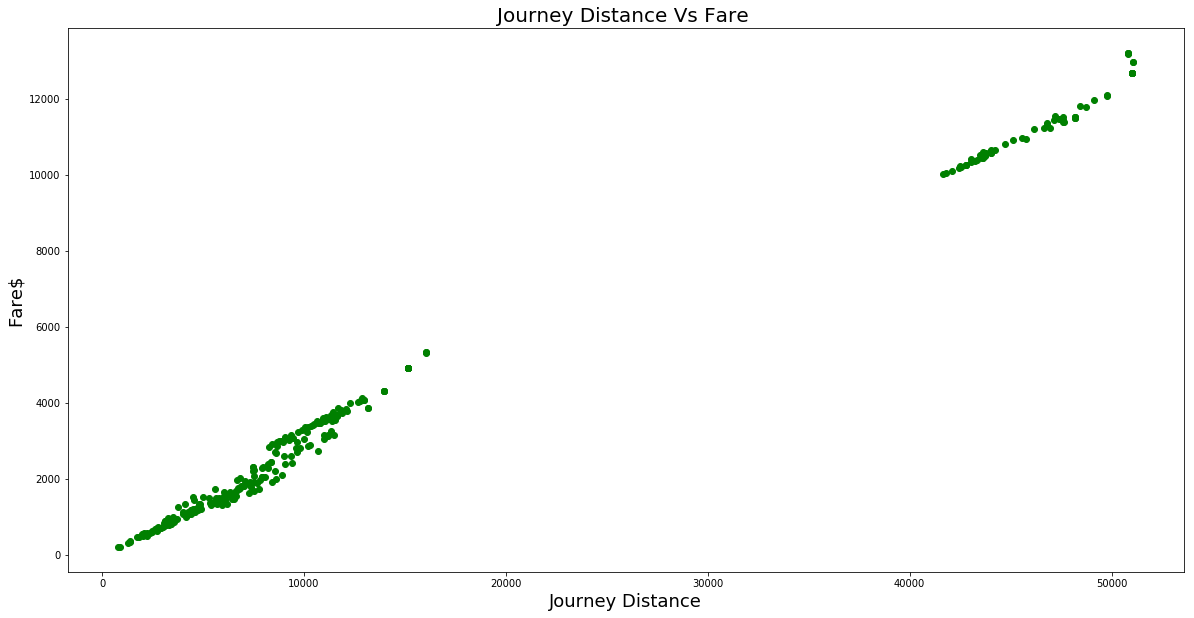

In [108]:
plt.figure(figsize=(20,10))
plt.scatter(dirtyData['Journey Distance(m)'], dirtyData['Travel Time(s)'], color ='green' ,label = "0")
plt.xlabel('Journey Distance', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Journey Distance Vs Fare ', fontsize=20)
plt.show()

In [109]:
temp = dirtyData[dirtyData['Travel Time(s)']!= dirtyData['Optimal Time']]
temp

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Shortest Dist,Journey Distance(m),...,Departure Time,Optimal Time,Travel Time(s),Arrival Time,Fare$,tempID,Cal Travel Time Normal,Cal Travel Time Swapped,Origin Node,Destination Node
0,ID3131303952,1,2,8,-37.820203,144.950883,-37.815834,145.046450,9025.0,9025.0,...,22:18:33,2605.14,2605.14,23:01:58,25.40,ID3,2605,83795,3908618732,1889485053
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,43061.0,...,12:22:32,10410.12,10410.12,15:16:02,55.60,ID3,10410,75990,5002706670,529157850
3,ID5979102483,2,5,3,-37.816432,144.928439,-37.819126,144.981687,6068.0,6068.0,...,16:25:24,1402.98,1402.98,16:48:46,141.42,ID5,1402,84998,4754200402,575434506
4,ID1843939740,0,3,6,-37.822615,145.007229,-37.787442,144.980409,6049.0,6049.0,...,17:49:15,1528.44,1528.44,18:14:43,8.84,ID1,1528,84872,250933582,2204638268
9,ID1702329937,0,2,6,-37.812284,144.923218,-37.790797,144.985865,7537.0,7537.0,...,21:44:51,2076.72,2076.72,22:19:27,11.17,ID1,2076,84324,3589874807,4307007286
12,ID3667867775,1,8,7,-37.807202,145.026637,-37.861835,144.905716,13986.0,13986.0,...,16:33:59,4298.28,4298.28,17:45:37,27.59,ID3,4298,82102,304700558,1390575046
15,ID3785098641,1,8,4,-37.815834,145.046450,-37.805452,145.000586,4548.0,4548.0,...,10:19:03,1434.90,1434.90,10:42:57,15.27,ID3,1434,84966,1889485053,277367211
20,ID3870798813,1,1,4,-37.813277,144.951508,-37.801854,145.006662,5469.0,5469.0,...,13:11:37,1366.02,1366.02,13:34:23,15.20,ID3,1366,85034,6167278770,1093410314
25,ID3492327497,1,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,50797.0,...,06:21:38,13204.98,13204.98,10:01:42,64.80,ID3,13204,73196,5002706670,1390575046
28,ID3483568997,1,4,7,-37.805028,145.005525,-37.861835,144.905716,12765.0,12765.0,...,08:04:40,4032.72,4032.72,9:11:52,27.40,ID3,4032,82368,207093495,1390575046


In [110]:
temp['Travel Time(s)'] = temp['Travel Time(s)'].apply(lambda x: int(x))
temp['Optimal Time'] = temp['Optimal Time'].apply(lambda x: int(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
temp[['Travel Time(s)','Optimal Time','Cal Travel Time Normal','Cal Travel Time Swapped']][temp['Travel Time(s)']!= temp['Optimal Time']]

,Travel Time(s),Optimal Time,Cal Travel Time Normal,Cal Travel Time Swapped
83,10653,10610,10610,75790
85,5312,5323,5323,81077
88,3040,3049,3049,83351
91,1933,1857,1857,84543
93,10512,10428,10428,75972
94,773,750,750,85650
97,10217,10241,10241,76159
99,1512,1444,1444,84956
100,324,341,341,86059
102,1183,1200,1200,85200


Since we can see that the calculated travel time and the optimal time are equal we can say that the issue must have been on the trave time so we are fixing the travel time by changing it with the value of the optimal time

In [112]:
#function used to replace travel time with the optimal time that has been found
#out from the shortest path whereever ther is a mismatch
TravelTimeIssueIDs = []
def fixTravelTime(val):
    if(int(val['Travel Time(s)'])!=int(val['Optimal Time'])):
        TravelTimeIssueIDs.append(val['Unnamed: 0'])
        return val['Optimal Time']
    return val['Travel Time(s)']

In [113]:
dirtyData['Travel Time(s)'] = dirtyData.apply(fixTravelTime,axis = 1)

In [114]:
idsInErrorList(TravelTimeIssueIDs)

False

In [115]:
errorList += TravelTimeIssueIDs

Validating whether those issues has been fixed or not

In [116]:
temp = dirtyData[dirtyData['Travel Time(s)']!= dirtyData['Optimal Time']]
temp['Travel Time(s)'] = temp['Travel Time(s)'].apply(lambda x: int(x))
temp['Optimal Time'] = temp['Optimal Time'].apply(lambda x: int(x))
temp[['Travel Time(s)','Optimal Time','Cal Travel Time Normal','Cal Travel Time Swapped']][temp['Travel Time(s)']!= temp['Optimal Time']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Travel Time(s),Optimal Time,Cal Travel Time Normal,Cal Travel Time Swapped


In [117]:
temp = dirtyData[dirtyData['Travel Time(s)']!= dirtyData['Cal Travel Time Normal']]
temp['Travel Time(s)'] = temp['Travel Time(s)'].apply(lambda x: int(x))
temp['Optimal Time'] = temp['Optimal Time'].apply(lambda x: int(x))
temp[['Travel Time(s)','Cal Travel Time Normal']][temp['Travel Time(s)']!= temp['Cal Travel Time Normal']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Travel Time(s),Cal Travel Time Normal
108,3467,12543
111,1492,15458
112,992,23202
113,1640,22544
116,2816,5314
117,873,16738
119,1117,21407
121,2840,18660
122,11530,21806
123,3603,19046


Since we know that our travel time is correct we know that the error coud either be either in the departure time or arrival time. We will assume that the departure time is always correct so on the basis of this assumption we will fix the arrival time as departure time + trave time 

In [118]:
arrivalTimeIssueID = []
#function used to fix arival time based on travel time + departure time 
#if there is a missmatch between travel time and difference between arrival & departure
def fixArivalTime(val):
    if(int(val['Travel Time(s)'])!= int(val['Cal Travel Time Normal'])):
        arrivalTimeIssueID.append(val['Unnamed: 0'])
        return getArrivalTime(val,int(val['Travel Time(s)']))
    return val['Arrival Time']
#functino used to return arrival time based on departure time + travel time
def getArrivalTime(val,travelTime):
    dep = val['Departure Time']
    dep = dep.split(':')
    arrivalTimeInSeconds = calculateTravelTimeInSeconds([0,0,0],dep)
    arrivalTimeInSeconds += travelTime
    hour = int(arrivalTimeInSeconds/3600)%24
    arrivalTimeInSeconds = arrivalTimeInSeconds % 3600
    minutes = int(arrivalTimeInSeconds/60)%60
    arrivalTimeInSeconds = arrivalTimeInSeconds % 60
    sec = int(arrivalTimeInSeconds%60)
    return str(hour)+":"+str(minutes)+":"+str(sec)

In [119]:
 dirtyData['Arrival Time']= dirtyData.apply(fixArivalTime,axis = 1)

In [120]:
idsInErrorList(arrivalTimeIssueID)

False

In [121]:
errorList += arrivalTimeIssueID

Now lets validate whether the issue is been fixed or not

In [122]:
dirtyData['Cal Travel Time Normal'] = dirtyData.apply(calTravelTimeNormal,axis=1)
tempData = dirtyData.copy()
tempData['Travel Time(s)'] = tempData['Travel Time(s)'].apply(lambda x: int(x) )
tempData = tempData[['Cal Travel Time Normal','Travel Time(s)','Arrival Time','Departure Time']][tempData['Travel Time(s)']!=tempData['Cal Travel Time Normal']]
tempData

,Cal Travel Time Normal,Travel Time(s),Arrival Time,Departure Time


In [123]:
len(set(errorList))

72

Now it looks like all the issues in the travel time is now fixed

### Origin and Destination Region

In [124]:
dirtyData['Origin Region'].value_counts()

8    40
9    36
4    36
7    34
6    34
2    34
5    33
1    31
3    27
Name: Origin Region, dtype: int64

In [125]:
dirtyData['Destination Region'].value_counts()

4    43
3    40
7    39
5    36
9    32
1    32
6    31
2    27
8    25
Name: Destination Region, dtype: int64

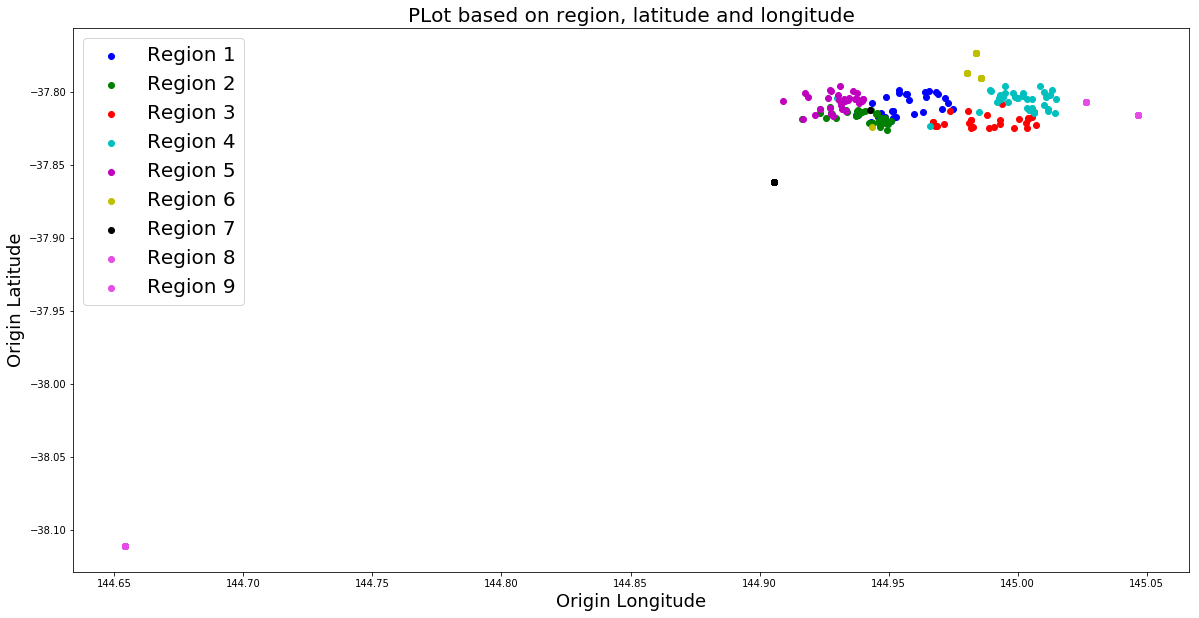

In [126]:
plt.figure(figsize=(20,10))
temp1 = dirtyData[dirtyData['Origin Region'] == 1]
temp2 = dirtyData[dirtyData['Origin Region'] == 2]
temp3 = dirtyData[dirtyData['Origin Region'] == 3]
temp4 = dirtyData[dirtyData['Origin Region'] == 4]
temp5 = dirtyData[dirtyData['Origin Region'] == 5]
temp6 = dirtyData[dirtyData['Origin Region'] == 6]
temp7 = dirtyData[dirtyData['Origin Region'] == 7]
temp8 = dirtyData[dirtyData['Origin Region'] == 8]
temp9 = dirtyData[dirtyData['Origin Region'] == 9]

plt.scatter(temp1['Origin Longitude'], temp1['Origin Latitude'], color ='b' ,label = "Region 1")
plt.scatter(temp2['Origin Longitude'], temp2['Origin Latitude'], color ='g' ,label = "Region 2")
plt.scatter(temp3['Origin Longitude'], temp3['Origin Latitude'], color ='r' ,label = "Region 3")
plt.scatter(temp4['Origin Longitude'], temp4['Origin Latitude'], color ='c' ,label = "Region 4")
plt.scatter(temp5['Origin Longitude'], temp5['Origin Latitude'], color ='m' ,label = "Region 5")
plt.scatter(temp6['Origin Longitude'], temp6['Origin Latitude'], color ='y' ,label = "Region 6")
plt.scatter(temp7['Origin Longitude'], temp7['Origin Latitude'], color ='k' ,label = "Region 7")
plt.scatter(temp8['Origin Longitude'], temp8['Origin Latitude'], color =(.9,.3,.9) ,label = "Region 8")
plt.scatter(temp9['Origin Longitude'], temp9['Origin Latitude'], color =(.9,.3,.9) ,label = "Region 9")
plt.xlabel('Origin Longitude', fontsize=18)
plt.ylabel('Origin Latitude', fontsize=18)
plt.title('PLot based on region, latitude and longitude', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

Now lets try to find the mean and median, latitude and longitude of various regions and check if which regions mean or median value is closer to each entries and if there is any miss match in those entries

In [127]:
originLatitudeMean = [0]*9
destinationLatitudeMean = [0]*9
originLongitudeMean = [0]*9
destinationLongitudeMean = [0]*9
originLatitudeMedian = [0]*9
destinationLatitudeMedian = [0]*9
originLongitudeMedian = [0]*9
destinationLongitudeMedian = [0]*9
for i in range(9):
    tempOrigin = dirtyData[dirtyData['Origin Region'] == i+1]
    tempDestination = dirtyData[dirtyData['Destination Region'] == i+1]
    originLatitudeMean[i] = tempOrigin['Origin Latitude'].mean()
    destinationLatitudeMean[i] = tempDestination['Destination Latitude'].mean()
    originLongitudeMean[i] = tempOrigin['Origin Longitude'].mean()
    destinationLongitudeMean[i] = tempDestination['Destination Longitude'].mean()
    originLatitudeMedian[i] = tempOrigin['Origin Latitude'].median()
    destinationLatitudeMedian[i] = tempDestination['Destination Latitude'].median()
    originLongitudeMedian[i] = tempOrigin['Origin Longitude'].median()
    destinationLongitudeMedian[i] = tempDestination['Destination Longitude'].median()

In [128]:
radius=6378 

#function used to calculate distance between two points on earth using Haversign formula
def calculateDistance(lat1,long1,lat2,long2):
    latitudeDiffRadians = math.radians(lat2-lat1)
    longitudeDiffRadians = math.radians(long2-long1)
    a = math.sin(latitudeDiffRadians / 2.0) ** 2 + math.cos(math.radians(lat1)) *\
            math.cos(math.radians(lat2)) * math.sin(longitudeDiffRadians / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))    
    return radius * c

#Function used to find min distance from each regions mean values to the given point for origin
def findRegionBasedOnMeanForOrigin(val):
    minDistance = -1
    minRegion = 0
    for i in range(9):
        lat2 = val['Origin Latitude']
        lat1 = originLatitudeMean[i]
        long2 = val['Origin Longitude']
        long1 = originLongitudeMean[i]
        givenVal = val['Origin Region']
        distance = calculateDistance(lat1,long1,lat2,long2)
        if(minDistance == -1):
            minDistance = distance
            minRegion = i+1
        elif(distance < minDistance):
            minDistance = distance
            minRegion = i+1
        elif(distance == minDistance and i+1 == givenVal):
            minRegion = givenVal
    return minRegion

#Function used to find min distance from each regions mean values to the given point for destination
def findRegionBasedOnMeanForDestination(val):
    minDistance = -1
    minRegion = 0
    for i in range(9):
        lat2 = val['Destination Latitude']
        lat1 = originLatitudeMean[i]
        long2 = val['Destination Longitude']
        long1 = originLongitudeMean[i]
        givenVal = val['Destination Region']
        distance = calculateDistance(lat1, long1, lat2, long2)
        if(minDistance == -1):
            minDistance = distance
            minRegion = i+1
        elif(distance < minDistance):
            minDistance = distance
            minRegion = i+1
        elif(distance == minDistance and i+1 == givenVal):
            minRegion = givenVal
    return minRegion

#Function used to find min distance from each regions median values to the given point for origin
def findRegionBasedOnMedianForOrigin(val):
    minDistance = -1
    minRegion = 0
    for i in range(9):
        lat2 = val['Origin Latitude']
        lat1 = originLatitudeMedian[i]
        long2 = val['Origin Longitude']
        long1 = originLongitudeMedian[i]
        givenVal = val['Origin Region']
        distance = calculateDistance(lat1,long1,lat2,long2)
        if(minDistance == -1):
            minDistance = distance
            minRegion = i+1
        elif(distance < minDistance):
            minDistance = distance
            minRegion = i+1
        elif(distance == minDistance and i+1 == givenVal):
            minRegion = givenVal
    return minRegion

#Function used to find min distance from each regions median values to the given point for destination
def findRegionBasedOnMedianForDestination(val):
    minDistance = -1
    minRegion = 0
    for i in range(9):
        lat2 = val['Destination Latitude']
        lat1 = originLatitudeMedian[i]
        long2 = val['Destination Longitude']
        long1 = originLongitudeMedian[i]
        givenVal = val['Destination Region']
        distance = calculateDistance(lat1, long1, lat2, long2)
        if(minDistance == -1):
            minDistance = distance
            minRegion = i+1
        elif(distance < minDistance):
            minDistance = distance
            minRegion = i+1
        elif(distance == minDistance and i+1 == givenVal):
            minRegion = givenVal
    return minRegion

In [129]:
dirtyData.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Shortest Dist,Journey Distance(m),...,Departure Time,Optimal Time,Travel Time(s),Arrival Time,Fare$,tempID,Cal Travel Time Normal,Cal Travel Time Swapped,Origin Node,Destination Node
0,ID3131303952,1,2,8,-37.820203,144.950883,-37.815834,145.046450,9025.0,9025.0,...,22:18:33,2605.14,2605.14,23:01:58,25.40,ID3,2605,83795,3908618732,1889485053
1,ID1519026843,0,6,4,-37.773845,144.983689,-37.806914,144.998466,6199.0,6199.0,...,04:08:36,1338.30,1338.30,4:30:54,11.24,ID1,1338,85062,2455254499,3807748049
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,43061.0,...,12:22:32,10410.12,10410.12,15:16:02,55.60,ID3,10410,75990,5002706670,529157850
3,ID5979102483,2,5,3,-37.816432,144.928439,-37.819126,144.981687,6068.0,6068.0,...,16:25:24,1402.98,1402.98,16:48:46,141.42,ID5,1402,84998,4754200402,575434506
4,ID1843939740,0,3,6,-37.822615,145.007229,-37.787442,144.980409,6049.0,6049.0,...,17:49:15,1528.44,1528.44,18:14:43,8.84,ID1,1528,84872,250933582,2204638268


In [130]:
dirtyData['Cal Destination region Mean'] = dirtyData.apply(findRegionBasedOnMeanForDestination,axis =1)
dirtyData['Cal Origin region Mean'] = dirtyData.apply(findRegionBasedOnMeanForOrigin,axis =1)
dirtyData['Cal Destination region Median'] = dirtyData.apply(findRegionBasedOnMedianForDestination,axis =1)
dirtyData['Cal Origin region Median'] = dirtyData.apply(findRegionBasedOnMedianForOrigin,axis =1)

In [131]:
dirtyData[dirtyData['Cal Destination region Mean']!=dirtyData['Destination Region']].describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Shortest Dist,Journey Distance(m),Optimal Time,Travel Time(s),Fare$,Cal Travel Time Normal,Cal Travel Time Swapped,Origin Node,Destination Node,Cal Destination region Mean,Cal Origin region Mean,Cal Destination region Median,Cal Origin region Median
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,1.700000e+01,17.00000,17.000000,17.00000,17.000000
mean,1.000000,5.176471,2.058824,-37.878399,144.897908,-37.818554,144.967402,15396.882353,15396.882353,3969.187059,3969.187059,91.051176,3968.705882,82431.294118,2.986842e+09,1.751933e+09,4.00000,5.176471,4.00000,5.176471
std,0.707107,2.789160,1.088037,0.134149,0.142082,0.017776,0.043338,18184.238071,18184.238071,4391.657021,4391.657021,205.930065,4391.647153,4391.647153,1.989918e+09,1.561464e+09,2.42384,2.789160,2.42384,2.789160
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-37.861835,144.905716,813.000000,813.000000,196.620000,196.620000,6.850000,196.000000,73719.000000,2.504798e+08,2.946278e+08,1.00000,1.000000,1.00000,1.000000
25%,1.000000,4.000000,1.000000,-37.861835,144.905716,-37.816902,144.937541,3123.000000,3123.000000,791.160000,791.160000,14.960000,791.000000,81077.000000,1.132015e+09,6.347778e+08,2.00000,4.000000,2.00000,4.000000
50%,1.000000,5.000000,2.000000,-37.813735,144.963110,-37.815834,144.970528,7035.000000,7035.000000,1793.640000,1793.640000,24.610000,1793.000000,84607.000000,2.885198e+09,1.390575e+09,4.00000,5.000000,4.00000,5.000000
75%,1.000000,7.000000,3.000000,-37.800966,144.985793,-37.813324,145.005412,16033.000000,16033.000000,5323.560000,5323.560000,61.850000,5323.000000,85609.000000,5.002707e+09,1.889485e+09,6.00000,7.000000,6.00000,7.000000
max,2.000000,9.000000,4.000000,-37.773803,145.010294,-37.787442,145.046450,51032.000000,51032.000000,12681.060000,12681.060000,874.700000,12681.000000,86204.000000,6.167418e+09,6.167358e+09,8.00000,9.000000,8.00000,9.000000


In [132]:
dirtyData[dirtyData['Cal Origin region Mean']!=dirtyData['Origin Region']].describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Shortest Dist,Journey Distance(m),Optimal Time,Travel Time(s),Fare$,Cal Travel Time Normal,Cal Travel Time Swapped,Origin Node,Destination Node,Cal Destination region Mean,Cal Origin region Mean,Cal Destination region Median,Cal Origin region Median
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000
mean,0.600000,2.666667,5.700000,-37.815896,144.949855,-37.854531,144.921027,11358.066667,11358.066667,2953.830000,2953.822000,35.778000,2953.233333,80596.800000,2.614176e+09,2.495073e+09,5.700000,2.833333,5.700000,2.900000
std,0.674665,1.688365,2.276567,0.004770,0.024309,0.105198,0.113214,13109.974502,13109.974502,3146.370453,3146.372886,59.954423,3146.341715,15453.430501,2.126853e+09,1.857175e+09,2.276567,1.440386,2.276567,1.516575
min,0.000000,1.000000,1.000000,-37.824387,144.916487,-38.110916,144.654173,1820.000000,1820.000000,451.560000,451.560000,5.720000,451.000000,451.000000,2.062046e+08,3.047006e+08,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,4.000000,-37.819844,144.930945,-37.861835,144.905716,3514.000000,3514.000000,861.195000,861.195000,10.487500,860.500000,83014.250000,6.220561e+08,8.801698e+08,4.000000,2.000000,4.000000,2.000000
50%,0.500000,2.000000,6.000000,-37.815745,144.943635,-37.814893,144.951473,7200.500000,7200.500000,1912.350000,1912.230000,17.340000,1911.500000,84369.500000,2.143579e+09,2.047062e+09,6.000000,2.000000,6.000000,2.000000
75%,1.000000,3.750000,7.000000,-37.813025,144.966809,-37.802732,144.983679,10292.250000,10292.250000,3306.540000,3306.540000,25.455000,3306.000000,85204.000000,4.636627e+09,4.599112e+09,7.000000,4.000000,7.000000,4.750000
max,2.000000,7.000000,9.000000,-37.804384,145.006235,-37.773803,145.046450,44034.000000,44034.000000,10628.520000,10628.520000,273.330000,10628.000000,85775.000000,6.197211e+09,6.197211e+09,9.000000,5.000000,9.000000,5.000000


In [133]:
dirtyData[dirtyData['Cal Destination region Median']!=dirtyData['Destination Region']].describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Shortest Dist,Journey Distance(m),Optimal Time,Travel Time(s),Fare$,Cal Travel Time Normal,Cal Travel Time Swapped,Origin Node,Destination Node,Cal Destination region Mean,Cal Origin region Mean,Cal Destination region Median,Cal Origin region Median
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01,1.900000e+01,19.000000,19.000000,19.000000,19.000000
mean,0.894737,5.052632,2.052632,-37.870301,144.908687,-37.818189,144.967904,14171.789474,14171.789474,3659.952632,3659.952632,82.351053,3659.473684,82740.526316,2.819516e+09,1.777796e+09,3.789474,5.052632,3.789474,5.052632
std,0.737468,2.655679,1.078769,0.128783,0.137838,0.016923,0.040899,17539.983576,17539.983576,4245.606465,4245.606465,195.899188,4245.596416,4245.596416,1.980677e+09,1.523312e+09,2.393949,2.655679,2.393949,2.655679
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-37.861835,144.905716,813.000000,813.000000,196.620000,196.620000,4.070000,196.000000,73719.000000,2.273245e+08,2.946278e+08,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,1.000000,-37.838485,144.922622,-37.817262,144.937853,2677.000000,2677.000000,681.330000,681.330000,11.725000,681.000000,81975.500000,9.279941e+08,7.406726e+08,2.000000,4.000000,2.000000,4.000000
50%,1.000000,4.000000,2.000000,-37.808915,144.971692,-37.815834,144.970528,6731.000000,6731.000000,1748.280000,1748.280000,21.150000,1748.000000,84652.000000,2.567156e+09,1.390575e+09,3.000000,4.000000,3.000000,4.000000
75%,1.000000,6.500000,3.000000,-37.800233,144.995883,-37.813155,144.992911,13469.500000,13469.500000,4424.910000,4424.910000,61.340000,4424.500000,85719.000000,4.850615e+09,2.047062e+09,5.500000,6.500000,5.500000,6.500000
max,2.000000,9.000000,4.000000,-37.773803,145.010994,-37.787442,145.046450,51032.000000,51032.000000,12681.060000,12681.060000,874.700000,12681.000000,86204.000000,6.167418e+09,6.167358e+09,8.000000,9.000000,8.000000,9.000000


In [134]:
dirtyData[dirtyData['Cal Origin region Median']!=dirtyData['Origin Region']].describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Shortest Dist,Journey Distance(m),Optimal Time,Travel Time(s),Fare$,Cal Travel Time Normal,Cal Travel Time Swapped,Origin Node,Destination Node,Cal Destination region Mean,Cal Origin region Mean,Cal Destination region Median,Cal Origin region Median
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,2.900000e+01,29.000000,29.000000,29.000000,29.000000
mean,0.655172,2.620690,5.655172,-37.816163,144.950073,-37.854279,144.921555,11402.758621,11402.758621,2939.911034,2939.902759,37.637586,2939.344828,80512.413793,2.593346e+09,2.533159e+09,5.655172,2.862069,5.655172,2.965517
std,0.669534,1.634752,2.303349,0.004621,0.024709,0.107051,0.115180,13339.972092,13339.972092,3201.208796,3201.211236,61.006239,3201.257055,15719.960263,2.161383e+09,1.878087e+09,2.303349,1.457104,2.303349,1.499589
min,0.000000,1.000000,1.000000,-37.824387,144.916487,-38.110916,144.654173,1820.000000,1820.000000,451.560000,451.560000,5.720000,451.000000,451.000000,2.062046e+08,3.047006e+08,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,4.000000,-37.820203,144.930085,-37.861835,144.905716,3150.000000,3150.000000,750.840000,750.840000,10.260000,750.000000,83005.000000,6.175648e+08,7.100347e+08,4.000000,2.000000,4.000000,2.000000
50%,1.000000,2.000000,6.000000,-37.816058,144.943728,-37.814824,144.965297,6864.000000,6864.000000,1795.860000,1795.860000,17.270000,1795.000000,84372.000000,1.982440e+09,2.204638e+09,6.000000,2.000000,6.000000,2.000000
75%,1.000000,3.000000,7.000000,-37.813162,144.967063,-37.801890,144.983689,10368.000000,10368.000000,3150.480000,3150.480000,26.070000,3150.000000,85208.000000,4.754200e+09,4.696481e+09,7.000000,4.000000,7.000000,5.000000
max,2.000000,7.000000,9.000000,-37.804384,145.006235,-37.773803,145.046450,44034.000000,44034.000000,10628.520000,10628.520000,273.330000,10628.000000,85775.000000,6.197211e+09,6.197211e+09,9.000000,5.000000,9.000000,5.000000


On comparing both mean and median's no of overall errors. mean seams to bee less hence I have choosen the region based on the distance from the mean values

In [135]:
destinationMeanIDs = dirtyData['Unnamed: 0'][dirtyData['Cal Destination region Mean']!=dirtyData['Destination Region']]
originMeanIDs = dirtyData['Unnamed: 0'][dirtyData['Cal Origin region Mean']!=dirtyData['Origin Region']]
destinationMedianIDs = dirtyData['Unnamed: 0'][dirtyData['Cal Destination region Median']!=dirtyData['Destination Region']]
originMedianIDs = dirtyData['Unnamed: 0'][dirtyData['Cal Origin region Median']!=dirtyData['Origin Region']]

In [136]:
idsInErrorList(destinationMeanIDs)

True

In [137]:
destIntersectionIDs = list(set(destinationMeanIDs) & set(errorList ))
destIntersectionIDs

['ID5482216292']

In [138]:
idsInErrorList(originMeanIDs)

True

In [139]:
intersectionIDs = list(set(originMeanIDs) & set(errorList ))
intersectionIDs

['ID1814774804',
 'ID3148231231',
 'ID5757667676',
 'ID5979102483',
 'ID3384558804',
 'ID3430665162',
 'ID3822412452',
 'ID1565838233',
 'ID1566212454']

In [140]:
idsInErrorList(destinationMedianIDs)

True

In [141]:
list(set(destinationMedianIDs) & set(errorList ))

['ID5482216292']

In [142]:
idsInErrorList(originMedianIDs)

True

In [143]:
set(originMedianIDs) & set(errorList )

{'ID1565838233',
 'ID1566212454',
 'ID1814774804',
 'ID3148231231',
 'ID3384558804',
 'ID3430665162',
 'ID3822412452',
 'ID5757667676',
 'ID5979102483'}

So we will fix rest of the errors except for those values which have already had another error as we know that there will only be one error per entry

In [144]:
#Function used to replace origin region with region we found by calculation
def fixOriginRegion(val):
    if(val['Cal Origin region Mean']!=val['Origin Region'] and val['Unnamed: 0'] not in intersectionIDs):
        return val['Cal Origin region Mean']
    return val['Origin Region']

#Function used to replace destination region with region we found by calculation
def fixDestinationRegion(val):
    if(val['Cal Destination region Mean']!=val['Destination Region'] and val['Unnamed: 0'] not in destIntersectionIDs):
        return val['Cal Destination region Mean']
    return val['Destination Region']   

In [145]:
dirtyData['Origin Region'] = dirtyData.apply(fixOriginRegion,axis =1)
dirtyData['Destination Region'] = dirtyData.apply(fixDestinationRegion,axis =1)

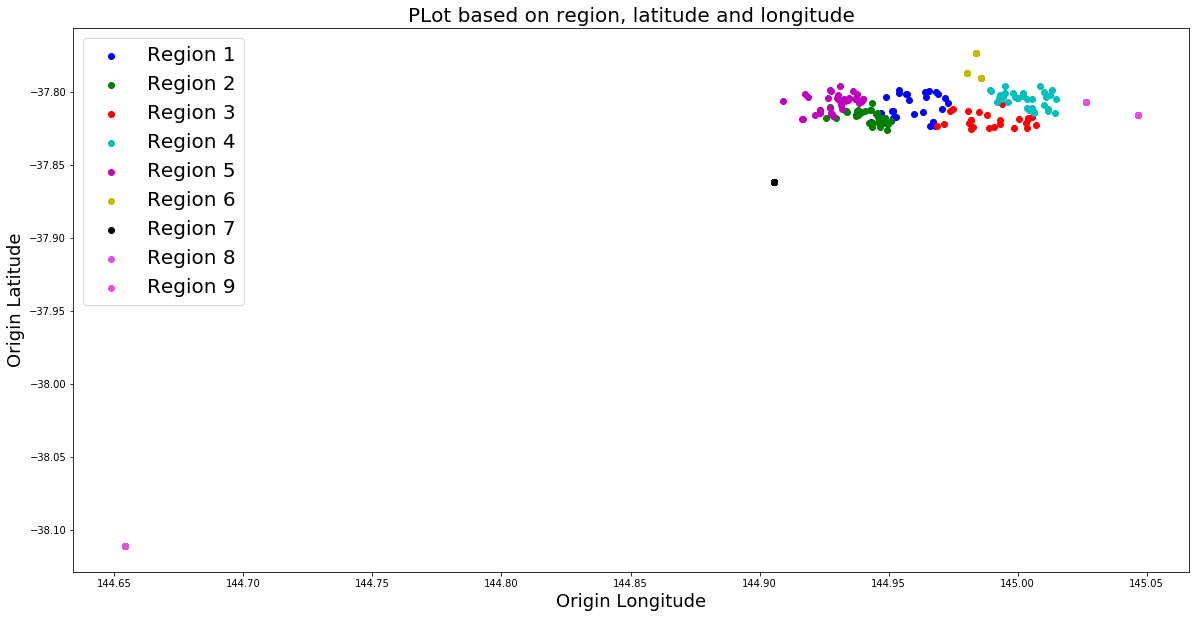

In [146]:
plt.figure(figsize=(20,10))
temp1 = dirtyData[dirtyData['Origin Region'] == 1]
temp2 = dirtyData[dirtyData['Origin Region'] == 2]
temp3 = dirtyData[dirtyData['Origin Region'] == 3]
temp4 = dirtyData[dirtyData['Origin Region'] == 4]
temp5 = dirtyData[dirtyData['Origin Region'] == 5]
temp6 = dirtyData[dirtyData['Origin Region'] == 6]
temp7 = dirtyData[dirtyData['Origin Region'] == 7]
temp8 = dirtyData[dirtyData['Origin Region'] == 8]
temp9 = dirtyData[dirtyData['Origin Region'] == 9]

plt.scatter(temp1['Origin Longitude'], temp1['Origin Latitude'], color ='b' ,label = "Region 1")
plt.scatter(temp2['Origin Longitude'], temp2['Origin Latitude'], color ='g' ,label = "Region 2")
plt.scatter(temp3['Origin Longitude'], temp3['Origin Latitude'], color ='r' ,label = "Region 3")
plt.scatter(temp4['Origin Longitude'], temp4['Origin Latitude'], color ='c' ,label = "Region 4")
plt.scatter(temp5['Origin Longitude'], temp5['Origin Latitude'], color ='m' ,label = "Region 5")
plt.scatter(temp6['Origin Longitude'], temp6['Origin Latitude'], color ='y' ,label = "Region 6")
plt.scatter(temp7['Origin Longitude'], temp7['Origin Latitude'], color ='k' ,label = "Region 7")
plt.scatter(temp8['Origin Longitude'], temp8['Origin Latitude'], color =(.9,.3,.9) ,label = "Region 8")
plt.scatter(temp9['Origin Longitude'], temp9['Origin Latitude'], color =(.9,.3,.9) ,label = "Region 9")
plt.xlabel('Origin Longitude', fontsize=18)
plt.ylabel('Origin Latitude', fontsize=18)
plt.title('PLot based on region, latitude and longitude', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

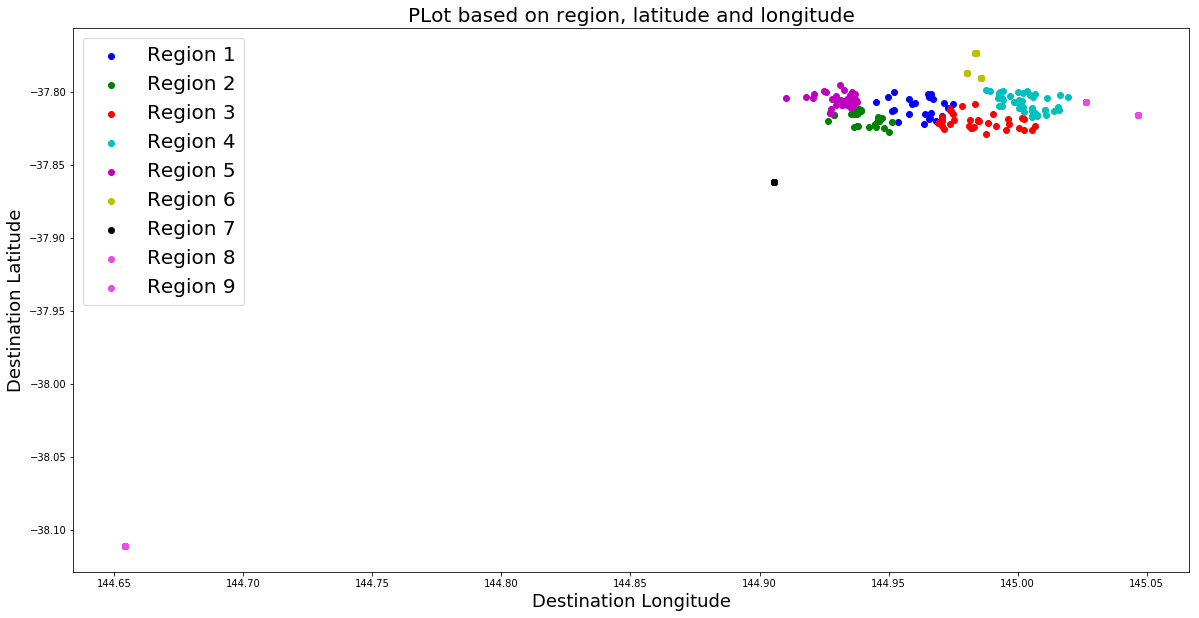

In [147]:
plt.figure(figsize=(20,10))
temp1 = dirtyData[dirtyData['Destination Region'] == 1]
temp2 = dirtyData[dirtyData['Destination Region'] == 2]
temp3 = dirtyData[dirtyData['Destination Region'] == 3]
temp4 = dirtyData[dirtyData['Destination Region'] == 4]
temp5 = dirtyData[dirtyData['Destination Region'] == 5]
temp6 = dirtyData[dirtyData['Destination Region'] == 6]
temp7 = dirtyData[dirtyData['Destination Region'] == 7]
temp8 = dirtyData[dirtyData['Destination Region'] == 8]
temp9 = dirtyData[dirtyData['Destination Region'] == 9]

plt.scatter(temp1['Destination Longitude'], temp1['Destination Latitude'], color ='b' ,label = "Region 1")
plt.scatter(temp2['Destination Longitude'], temp2['Destination Latitude'], color ='g' ,label = "Region 2")
plt.scatter(temp3['Destination Longitude'], temp3['Destination Latitude'], color ='r' ,label = "Region 3")
plt.scatter(temp4['Destination Longitude'], temp4['Destination Latitude'], color ='c' ,label = "Region 4")
plt.scatter(temp5['Destination Longitude'], temp5['Destination Latitude'], color ='m' ,label = "Region 5")
plt.scatter(temp6['Destination Longitude'], temp6['Destination Latitude'], color ='y' ,label = "Region 6")
plt.scatter(temp7['Destination Longitude'], temp7['Destination Latitude'], color ='k' ,label = "Region 7")
plt.scatter(temp8['Destination Longitude'], temp8['Destination Latitude'], color =(.9,.3,.9) ,label = "Region 8")
plt.scatter(temp9['Destination Longitude'], temp9['Destination Latitude'], color =(.9,.3,.9) ,label = "Region 9")

plt.xlabel('Destination Longitude', fontsize=18)
plt.ylabel('Destination Latitude', fontsize=18)
plt.title('PLot based on region, latitude and longitude', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

Now looks like the issues in regions have been fixed

Now dropping of unnecessary columns

In [148]:
dirtyData.columns

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Shortest Dist', 'Journey Distance(m)',
       'Departure Date', 'Departure Time', 'Optimal Time', 'Travel Time(s)',
       'Arrival Time', 'Fare$', 'tempID', 'Cal Travel Time Normal',
       'Cal Travel Time Swapped', 'Origin Node', 'Destination Node',
       'Cal Destination region Mean', 'Cal Origin region Mean',
       'Cal Destination region Median', 'Cal Origin region Median'],
      dtype='object')

In [149]:
dirtyData.drop([ 'tempID','Cal Travel Time Normal',
       'Cal Travel Time Swapped', 'Origin Node', 'Destination Node',
       'Cal Destination region Mean', 'Cal Origin region Mean',
       'Cal Destination region Median', 'Cal Origin region Median','Shortest Dist','Optimal Time'],axis=1,inplace = True)

Now lets validate if all unnecessary columns has been removed

In [150]:
dirtyData.columns

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

Now it looks like all the issues in the dirty data is cleaned

In [151]:
tempData = dirtyData.copy()
tempData.set_index('Unnamed: 0',inplace=True)
del tempData.index.name

In [152]:
tempData.to_csv(r'29566428_dirty_data_solution.csv')

# Task2: Finding the missing Values

## Introduction
In this task we will find all the missing values and fix them for the missing value data set

### Checking the Data

In [153]:
missingData.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1145700030,0.0,8,6,-37.815834,145.046450,-37.787433,144.980377,8361.0,2018-06-02,19:58:08,2438.22,20:38:46,13.92
1,ID5816130836,2.0,4,7,-37.800866,145.008239,-37.861835,144.905716,12806.0,2018-06-10,20:13:18,4096.80,21:21:34,327.50
2,ID5957160231,NaN,4,7,-37.814270,145.011127,-37.861835,144.905716,12297.0,2018-06-16,14:06:21,3830.94,15:10:11,307.53
3,ID1302185069,NaN,4,9,-37.807900,144.991930,-38.110916,144.654173,46375.0,2018-06-26,21:52:08,11185.80,0:58:33,29.56
4,ID5968659195,2.0,1,3,-37.820610,144.956855,-37.819667,144.979626,2155.0,2018-03-17,17:01:02,579.30,17:10:41,66.96


In [154]:
missingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
Unnamed: 0               121 non-null object
Uber Type                100 non-null float64
Origin Region            121 non-null int64
Destination Region       121 non-null int64
Origin Latitude          121 non-null float64
Origin Longitude         121 non-null float64
Destination Latitude     121 non-null float64
Destination Longitude    121 non-null float64
Journey Distance(m)      121 non-null float64
Departure Date           121 non-null object
Departure Time           121 non-null object
Travel Time(s)           121 non-null float64
Arrival Time             121 non-null object
Fare$                    102 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 13.3+ KB


Now lets check which all Columns have a missing value

In [155]:
missingData.isnull().sum()

Unnamed: 0                0
Uber Type                21
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    19
dtype: int64

### Uber Type

We can see that only UberType and Fare$ has missing data. So lets first fix Uber Type

In [156]:
missingData['Uber Type'].value_counts()

0.0    58
1.0    33
2.0     9
Name: Uber Type, dtype: int64

Earlier we know that uber type has its values based on the first 3 values of the ID. Now lets check if that is also the case in this data

In [157]:
missingData['tempID'] = missingData['Unnamed: 0'].apply(lambda x: x[:3])

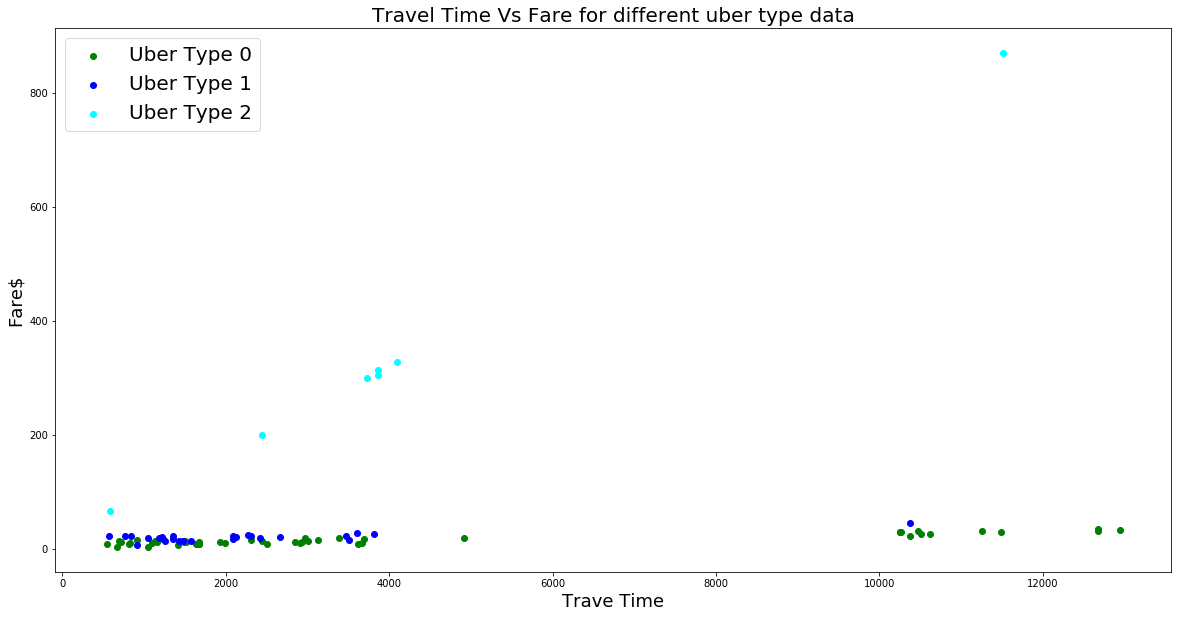

In [158]:
plt.figure(figsize=(20,10))
temp0 = missingData[missingData['Uber Type'] == 0.0]
temp1 = missingData[missingData['Uber Type'] == 1.0]
temp2 = missingData[missingData['Uber Type'] == 2.0]

plt.scatter(temp0['Travel Time(s)'], temp0['Fare$'], color ='green' ,label = "Uber Type 0")
plt.scatter(temp1['Travel Time(s)'], temp1['Fare$'], color ='blue' ,label = "Uber Type 1")
plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='cyan' ,label = "Uber Type 2")

plt.xlabel('Trave Time', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare for different uber type data', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

In [159]:
missingData['tempID'].value_counts()

ID1    65
ID3    42
ID5    14
Name: tempID, dtype: int64

In [160]:
missingData['Uber Type'][missingData['tempID'] == 'ID3'].value_counts()

1.0    33
Name: Uber Type, dtype: int64

In [161]:
missingData['Uber Type'][missingData['tempID'] == 'ID1'].value_counts()


0.0    58
Name: Uber Type, dtype: int64

In [162]:
missingData['Uber Type'][missingData['tempID'] == 'ID5'].value_counts()

2.0    9
Name: Uber Type, dtype: int64

From these vales it is pretty much clear that the ubertype is actualy calculated using the ID's first 3 letters. So lets fix the missing values based on this


In [163]:
#Function used to return missing uber type based on its ID
def missingDataUberTypeFix(val):
    if(np.isnan(val['Uber Type'])):
        if(val['tempID'] == 'ID1'):
            return 0.0
        elif(val['tempID'] == 'ID3'):
            return 1.0
        elif(val['tempID'] == 'ID5'):
            return 2.0
    return val['Uber Type']

In [164]:
missingData['Uber Type'] = missingData.apply(missingDataUberTypeFix,axis = 1)

Now lets validate whether the issue is been fixed or not

In [165]:
missingData.isnull().sum()

Unnamed: 0                0
Uber Type                 0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    19
tempID                    0
dtype: int64

In [166]:
missingData.drop('tempID',axis=1,inplace=True)

There is no missing value in the ubertype not lets just plot it and check if everything looks ok or not

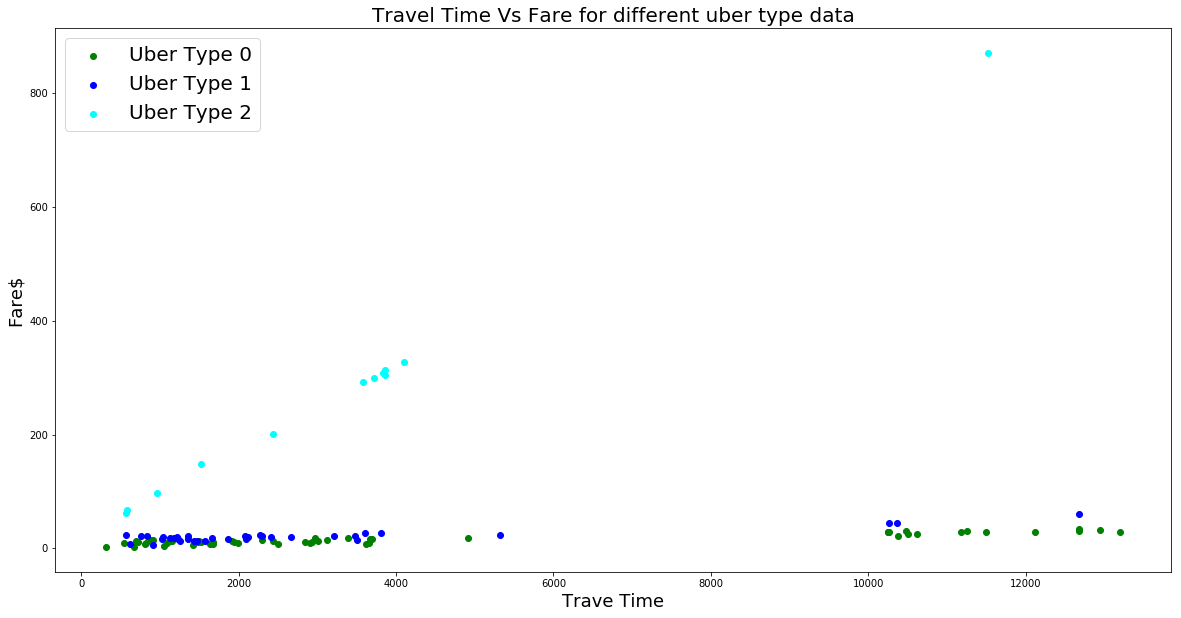

In [167]:
plt.figure(figsize=(20,10))
temp0 = missingData[missingData['Uber Type'] == 0.0]
temp1 = missingData[missingData['Uber Type'] == 1.0]
temp2 = missingData[missingData['Uber Type'] == 2.0]

plt.scatter(temp0['Travel Time(s)'], temp0['Fare$'], color ='green' ,label = "Uber Type 0")
plt.scatter(temp1['Travel Time(s)'], temp1['Fare$'], color ='blue' ,label = "Uber Type 1")
plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='cyan' ,label = "Uber Type 2")

plt.xlabel('Trave Time', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare for different uber type data', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

It looks ike the issue with the uber Type is been fixed.

### Fare

Now we already have a cleaned data set so now lets use that data set as a training dataset for our model and use that model to predict the missing values for Fare

In [168]:
cleanedData = dirtyData.copy()

We Also Know that for weekend and weekdays the fare is different so lets add a new column to represent that in both cleaned data and the missing data

In [169]:
#function used to check whether the diven day is a weekday or weekend
def getWeekendOrWeekday(val):
    weekno = datetime.strptime(val, '%Y-%m-%d').weekday()
    if weekno<5:
        return 1
    else:
        return 0

In [170]:
missingData['weekday'] = missingData['Departure Date'].apply(getWeekendOrWeekday)
cleanedData['weekday'] = cleanedData['Departure Date'].apply(getWeekendOrWeekday)

We Also Know for different time in the day the fare is different so lets add a new column to represent that in both cleaned data and the missing data

In [171]:
#Function used to return the respective time category of a day
def getTimeSection(val):
    if('06:00:00' >= val and val < '11:59:59'):
        return 0
    elif('12:00:00' >= val and val < '20:59:59'):
        return 1
    else:
        return 2

In [172]:
missingData['Time'] = missingData['Departure Time'].apply(getTimeSection)
cleanedData['Time'] = cleanedData['Departure Time'].apply(getTimeSection)

In [173]:
missingData.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,weekday,Time
0,ID1145700030,0.0,8,6,-37.815834,145.046450,-37.787433,144.980377,8361.0,2018-06-02,19:58:08,2438.22,20:38:46,13.92,0,2
1,ID5816130836,2.0,4,7,-37.800866,145.008239,-37.861835,144.905716,12806.0,2018-06-10,20:13:18,4096.80,21:21:34,327.50,0,2
2,ID5957160231,2.0,4,7,-37.814270,145.011127,-37.861835,144.905716,12297.0,2018-06-16,14:06:21,3830.94,15:10:11,307.53,0,2
3,ID1302185069,0.0,4,9,-37.807900,144.991930,-38.110916,144.654173,46375.0,2018-06-26,21:52:08,11185.80,0:58:33,29.56,1,2
4,ID5968659195,2.0,1,3,-37.820610,144.956855,-37.819667,144.979626,2155.0,2018-03-17,17:01:02,579.30,17:10:41,66.96,0,2


We Also know that for different uber type the fare is different. So lets try to spit the data based on uber time and find the missing values for each uber type and then replace the missing values of the original missing values with the values that we found out for each uber type

In [174]:
missingData['Uber Type'].value_counts()

0.0    65
1.0    42
2.0    14
Name: Uber Type, dtype: int64

In [175]:
miss0 = missingData[missingData['Uber Type'] == 0.0]
miss1 = missingData[missingData['Uber Type'] == 1.0]
miss2 = missingData[missingData['Uber Type'] == 2.0]

We know that while creating the model and trying to predict the values only numerical values can be applied . So removing all the columns with non numerical values

In [176]:
miss0.drop(['Arrival Time','Departure Time','Departure Date','Uber Type'],axis=1,inplace = True)
miss1.drop(['Arrival Time','Departure Time','Departure Date','Uber Type'],axis=1,inplace = True)
miss2.drop(['Arrival Time','Departure Time','Departure Date','Uber Type'],axis=1,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Similarly all these changes are done for training data also

In [177]:
train0 = cleanedData[cleanedData['Uber Type'] == 0]
train1 = cleanedData[cleanedData['Uber Type'] == 1]
train2 = cleanedData[cleanedData['Uber Type'] == 2]
train0.drop(['Arrival Time','Departure Time','Departure Date','Uber Type','Unnamed: 0'],axis=1,inplace = True)
train1.drop(['Arrival Time','Departure Time','Departure Date','Uber Type','Unnamed: 0'],axis=1,inplace = True)
train2.drop(['Arrival Time','Departure Time','Departure Date','Uber Type','Unnamed: 0'],axis=1,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Similarly copy of missing data is been made so that we can used that copy to calculate the performance of our model. By deletting all the rows with na values

In [178]:
drop0 = miss0.copy()
drop1 = miss1.copy()
drop2 = miss2.copy()
drop0.drop(['Unnamed: 0'],axis=1,inplace = True)
drop1.drop(['Unnamed: 0'],axis=1,inplace = True)
drop2.drop(['Unnamed: 0'],axis=1,inplace = True)

In [179]:
drop0.dropna(axis=0,inplace=True)
drop0.isnull().sum()

Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Travel Time(s)           0
Fare$                    0
weekday                  0
Time                     0
dtype: int64

In [180]:
drop1.dropna(axis=0,inplace=True)
drop1.isnull().sum()

Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Travel Time(s)           0
Fare$                    0
weekday                  0
Time                     0
dtype: int64

In [181]:
drop2.dropna(axis=0,inplace=True)
drop2.isnull().sum()

Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Travel Time(s)           0
Fare$                    0
weekday                  0
Time                     0
dtype: int64

In [182]:
lm_for_impute = LinearRegression() #instatiate

### uber Type 0

Now lets train the model based on our training data and try to predict the values of missing fare in missing data for uber type 0

In [183]:
lm_for_impute.fit(train0[[x for x in train0.columns if x != 'Fare$']],train0['Fare$']) #fit
lm_for_impute.predict(miss0.drop(['Fare$','Unnamed: 0'],axis=1)) 

array([13.10661937, 21.36447166,  8.20966795, 11.90984477, 22.64438342,
        8.8853288 , 21.28947571, 11.65352119,  9.40704264, 20.35571763,
       26.43329927, 12.55729348,  9.24553155, 13.24261222, 14.95954936,
       21.61313696,  9.87856945, 15.04978327, 12.03892145, 25.15918222,
       11.13107812, 10.88017493,  7.85868574,  9.14215837, 20.53485059,
        8.70077681,  8.00473872,  8.5912845 , 11.2094745 , 10.68397686,
        7.17708039, 10.11005589, 20.8360173 , 23.86472208, 12.38435719,
       11.41145048, 13.7189725 , 12.58247011, 16.27770464,  8.57440992,
        7.45207085,  7.34177771,  8.81816354, 13.17609796, 12.57019679,
       24.67669608,  9.95121925,  8.34241529,  9.66724889, 22.11823244,
        9.83584296, 25.10467901, 24.45000361,  8.44200644, 15.3985041 ,
       10.96551182, 23.84215948, 20.71321226,  9.84336886, 12.87065228,
       12.46420457,  8.83746332, 13.62238674, 10.91125008, 21.71837819])

Now lets replace the missing values with new predicted values

In [184]:
miss0['Fare$'][miss0['Fare$'].isnull()] = lm_for_impute.predict(miss0.drop(['Fare$','Unnamed: 0'],axis=1)) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Now lets check the performance of this prediction

In [185]:
tempCleanedData = train0
X_train, X_test, y_train, y_test = train_test_split(tempCleanedData[[x for x in tempCleanedData.columns if x != 'Fare$']],tempCleanedData['Fare$'], random_state = 111)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
lm_full = LinearRegression()
lm_full.fit(X_train,y_train)

print ('r-squared for Cleaned Data model = ',lm_full.score(X_test,y_test))

tempMissingData0 = miss0.copy()
tempMissingData0.drop('Unnamed: 0',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(tempMissingData0[[x for x in tempMissingData0.columns if x != 'Fare$']],tempMissingData0['Fare$'], random_state = 111)
lm_dropped = LinearRegression()
lm_dropped.fit(X_train,y_train)

print ('r-squared for missing data model = ',lm_dropped.score(X_test,y_test))

tempMissingDataDropNaGP0 = drop0
X_train, X_test, y_train, y_test = train_test_split(tempMissingDataDropNaGP0[[x for x in tempMissingDataDropNaGP0.columns if x != 'Fare$']],tempMissingDataDropNaGP0['Fare$'], random_state = 111)
lm_dropped = LinearRegression()
lm_dropped.fit(X_train,y_train)

print ('r-squared for missing data after dropping na rows model = ',lm_dropped.score(X_test,y_test))

r-squared for Cleaned Data model =  0.6130359971910718
r-squared for missing data model =  0.7761714709877656
r-squared for missing data after dropping na rows model =  0.7378362547953431


### uber Type 1
Now lets train the model based on our training data and try to predict the values of missing fare in missing data for uber type 1

In [186]:
lm_for_impute.fit(train1[[x for x in train1.columns if x != 'Fare$']],train1['Fare$']) #fit
lm_for_impute.predict(miss1.drop(['Fare$','Unnamed: 0'],axis=1)) 

array([22.63241998, 19.60802181, 14.68009854, 55.56564766, 13.20159804,
       17.59656123, 21.0352454 , 68.41689389, 21.97531454, 19.55900854,
       13.88959868, 20.70667789, 14.99579575, 20.69607765, 20.9281925 ,
       15.56974528, 18.48399724, 16.08093224, 24.14169372, 23.94632033,
       33.21747259, 17.09496404, 18.17523449, 14.78608266, 15.2935579 ,
       17.43093677, 26.50488144, 28.53788315, 58.00035585, 21.72031762,
       16.87771169, 16.30169926, 56.16569599, 22.8753823 , 60.20700087,
       14.80252239, 16.79378064, 28.24905222, 15.3952513 , 27.53170434,
       15.86463526, 13.02330878])

Now lets replace the missing values with new predicted values


In [187]:
miss1['Fare$'][miss1['Fare$'].isnull()] = lm_for_impute.predict(miss1.drop(['Fare$','Unnamed: 0'],axis=1)) 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Now lets check the performance of this prediction


In [188]:
tempCleanedData = train1
X_train, X_test, y_train, y_test = train_test_split(tempCleanedData[[x for x in tempCleanedData.columns if x != 'Fare$']],tempCleanedData['Fare$'], random_state = 111)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
lm_full = LinearRegression()
lm_full.fit(X_train,y_train)

print ('r-squared for Cleaned Data model = ',lm_full.score(X_test,y_test))

tempMissingData0 = miss1.copy()
tempMissingData0.drop('Unnamed: 0',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(tempMissingData0[[x for x in tempMissingData0.columns if x != 'Fare$']],tempMissingData0['Fare$'], random_state = 111)
lm_dropped = LinearRegression()
lm_dropped.fit(X_train,y_train)

print ('r-squared for missing data model = ',lm_dropped.score(X_test,y_test))

tempMissingDataDropNaGP0 = drop1
X_train, X_test, y_train, y_test = train_test_split(tempMissingDataDropNaGP0[[x for x in tempMissingDataDropNaGP0.columns if x != 'Fare$']],tempMissingDataDropNaGP0['Fare$'], random_state = 111)
lm_dropped = LinearRegression()
lm_dropped.fit(X_train,y_train)

print ('r-squared for missing data after dropping na rows model = ',lm_dropped.score(X_test,y_test))

r-squared for Cleaned Data model =  0.9639466885782919
r-squared for missing data model =  0.7354807316449987
r-squared for missing data after dropping na rows model =  0.4624526093724284


### uber Type 2
Now lets train the model based on our training data and try to predict the values of missing fare in missing data for uber type 2

In [189]:
lm_for_impute.fit(train2[[x for x in train2.columns if x != 'Fare$']],train2['Fare$']) #fit
lm_for_impute.predict(miss2.drop(['Fare$','Unnamed: 0'],axis=1)) 

array([363.66266411, 342.09135318,  71.54977433, 103.93673892,
        59.36886964, 153.07121252, 941.99943603, 338.01979925,
       314.37314313, 331.76441758, 104.61914739, 330.5636226 ,
       215.74533248, 174.03125511])

Now lets replace the missing values with new predicted values


In [190]:
miss2['Fare$'][miss2['Fare$'].isnull()] = lm_for_impute.predict(miss2.drop(['Fare$','Unnamed: 0'],axis=1)) 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Now lets check the performance of this prediction


In [191]:
tempCleanedData = train2
X_train, X_test, y_train, y_test = train_test_split(tempCleanedData[[x for x in tempCleanedData.columns if x != 'Fare$']],tempCleanedData['Fare$'], random_state = 111)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
lm_full = LinearRegression()
lm_full.fit(X_train,y_train)

print ('r-squared for Cleaned Data model = ',lm_full.score(X_test,y_test))

tempMissingData0 = miss2.copy()
tempMissingData0.drop('Unnamed: 0',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(tempMissingData0[[x for x in tempMissingData0.columns if x != 'Fare$']],tempMissingData0['Fare$'], random_state = 111)
lm_dropped = LinearRegression()
lm_dropped.fit(X_train,y_train)

print ('r-squared for missing data model = ',lm_dropped.score(X_test,y_test))

tempMissingDataDropNaGP0 = drop2
X_train, X_test, y_train, y_test = train_test_split(tempMissingDataDropNaGP0[[x for x in tempMissingDataDropNaGP0.columns if x != 'Fare$']],tempMissingDataDropNaGP0['Fare$'], random_state = 111)
lm_dropped = LinearRegression()
lm_dropped.fit(X_train,y_train)

print ('r-squared for missing data after dropping na rows model = ',lm_dropped.score(X_test,y_test))

r-squared for Cleaned Data model =  0.9994098848858081
r-squared for missing data model =  0.9960008573791443
r-squared for missing data after dropping na rows model =  0.9213792071541202


Now lets replace the new predicted values for the origin values

In [192]:
#Function used to get fare from predicted value for the missing value
def getFare(val):
    if(np.isnan(val['Fare$'])):
        if(val['Uber Type'] == 0.0):
           return float(miss0['Fare$'][miss0['Unnamed: 0'] == val['Unnamed: 0']])
        elif(val['Uber Type'] == 1.0):
           return float(miss1['Fare$'][miss1['Unnamed: 0'] == val['Unnamed: 0']])
        else:
           return float(miss2['Fare$'][miss2['Unnamed: 0'] == val['Unnamed: 0']]) 
    return val['Fare$']

In [193]:
missingData.isnull().sum()

Unnamed: 0                0
Uber Type                 0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    19
weekday                   0
Time                      0
dtype: int64

In [194]:
missingData['Fare$'] = missingData.apply(getFare,axis=1)

Now lets validate whether the values are fixed or not

In [195]:
missingData.isnull().sum()

Unnamed: 0               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
weekday                  0
Time                     0
dtype: int64

Now lets remove all unwanted coumns

In [196]:
missingData.drop(['weekday','Time'],axis=1,inplace = True)

In [197]:
missingData.columns

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

In [198]:
tempData = missingData.copy()
tempData.set_index('Unnamed: 0',inplace=True)
del tempData.index.name

In [199]:
tempData.to_csv(r'29566428_missing_value_solution.csv')

Looks like all the issue in missing data is fixed

# Task 3: Outlier Detection

### Introduction
In this task we wil identify the outliers in the outlier data and fix those issues

First lets try to analyse the fare column

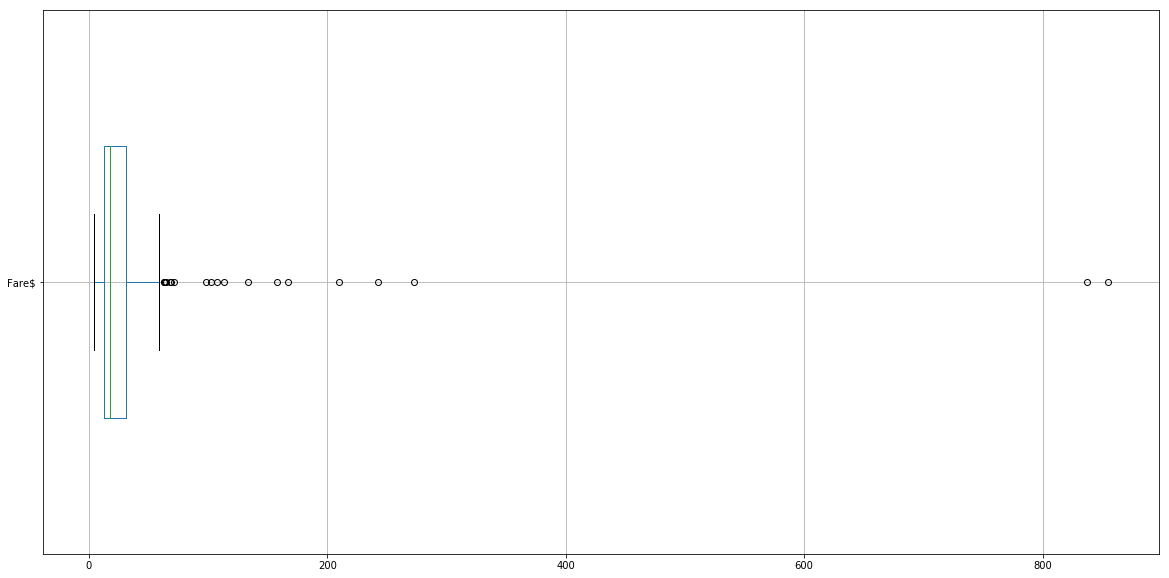

In [200]:
plt.figure(figsize=(20,10))
outlierData.boxplot(column = 'Fare$',vert=False,figsize=(20,12),widths = .5)
plt.show()

In [201]:
outlierData['Uber Type'].value_counts()

0    53
1    48
2    15
Name: Uber Type, dtype: int64

<Figure size 1440x720 with 0 Axes>

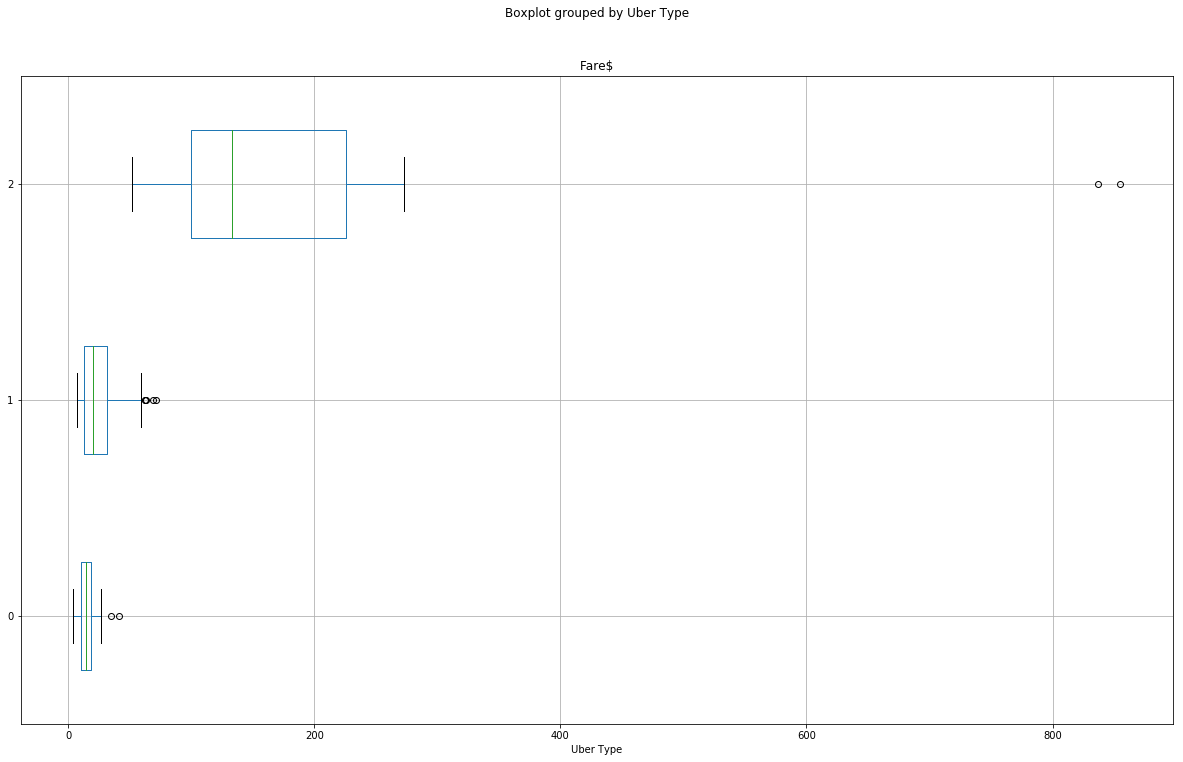

In [202]:
plt.figure(figsize=(20,10))
outlierData.boxplot(column = 'Fare$', by = 'Uber Type',vert=False,figsize=(20,12),widths = .5)
plt.show()

Fare is actually relative to travel distance right so lets add a new column fare/time

In [203]:
outlierData['fare/time'] = outlierData['Fare$']/outlierData['Travel Time(s)']

<Figure size 1440x720 with 0 Axes>

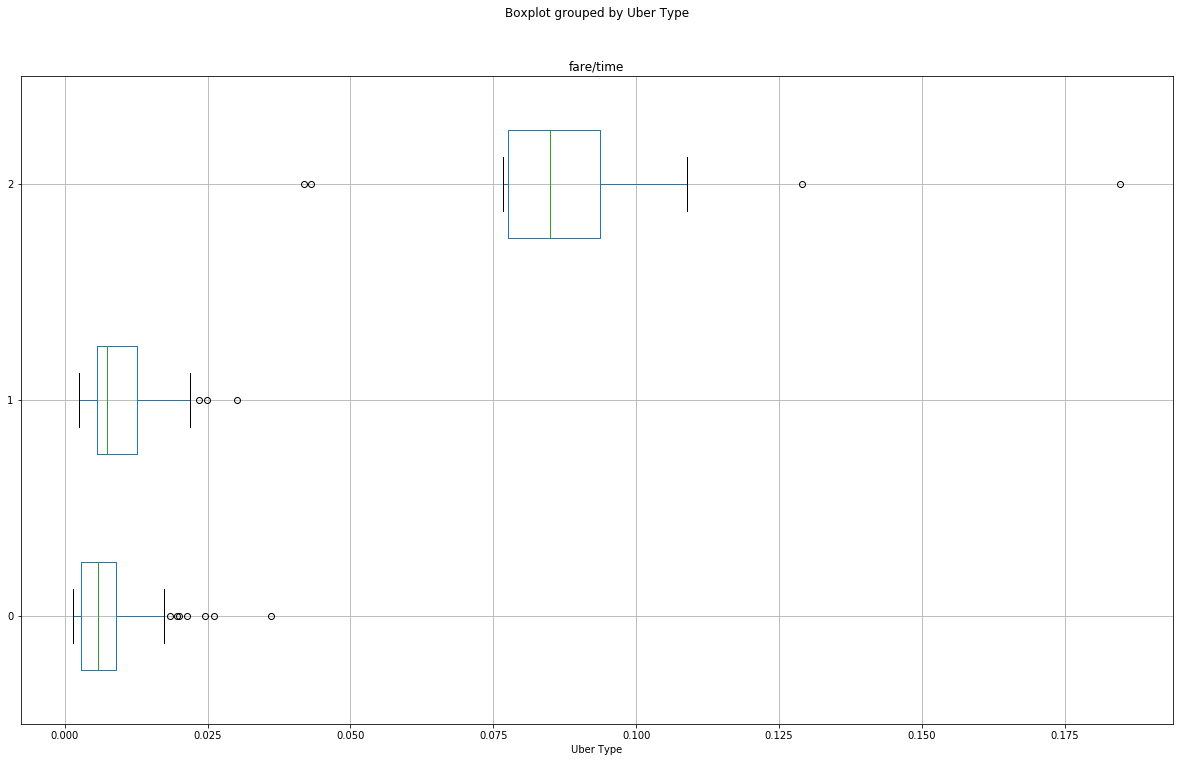

In [204]:
plt.figure(figsize=(20,10))
outlierData.boxplot(column = 'fare/time', by = 'Uber Type',vert=False,figsize=(20,12),widths = .5)
plt.show()

Now lets analyse the values with fare/time >0.125 and fare/time < 0.075 by plotting those values

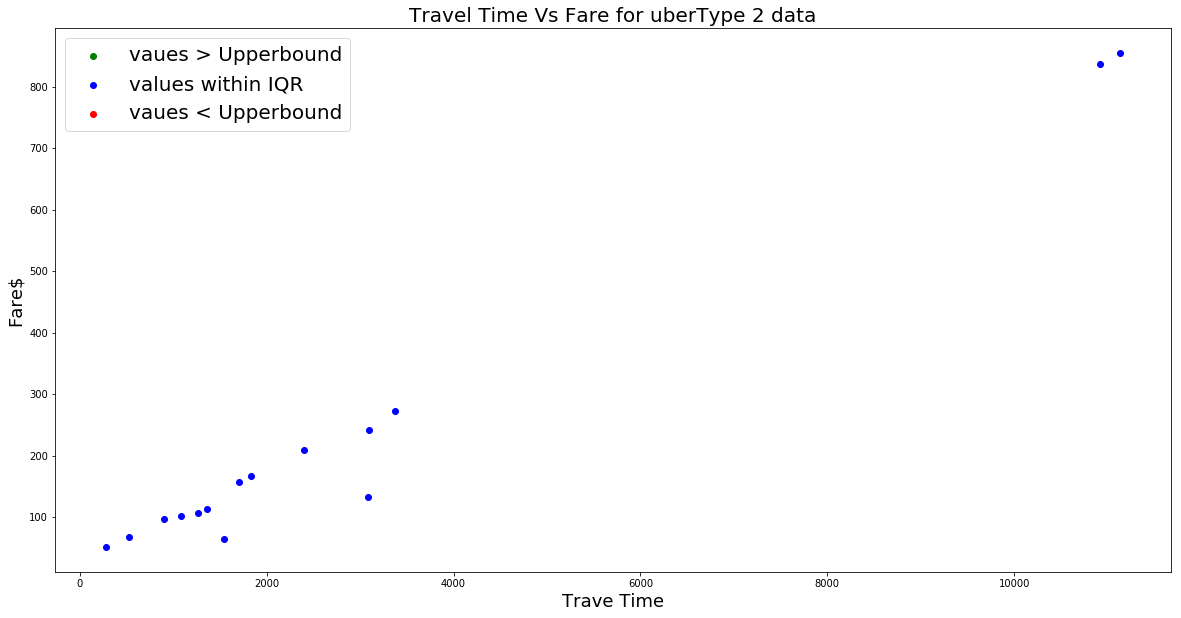

In [205]:
mean=outlierData['fare/time'][outlierData['Uber Type'] == 2].mean()
standardDeviation =outlierData['fare/time'][outlierData['Uber Type'] == 2].std()
lowerbound = mean-3*standardDeviation
upperbound = mean+3*standardDeviation

plt.figure(figsize=(20,10))
temp2 = outlierData[(outlierData['Uber Type'] == 2) & (outlierData['fare/time'] > upperbound)]
temp3 = outlierData[(outlierData['Uber Type'] == 2) & (outlierData['fare/time'] < upperbound) & (outlierData['fare/time'] > lowerbound)]
temp4 = outlierData[(outlierData['Uber Type'] == 2) & (outlierData['fare/time'] < lowerbound)]

plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='green' ,label = "vaues > Upperbound")
plt.scatter(temp3['Travel Time(s)'], temp3['Fare$'], color ='blue' ,label = "values within IQR")
plt.scatter(temp4['Travel Time(s)'], temp4['Fare$'], color ='red' ,label = "vaues < Upperbound")
plt.legend(fontsize = 20)

plt.xlabel('Trave Time', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare for uberType 2 data', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

Here the values with fare/time < 0.075 and fare/time >0.125 definitly looks like outliers so we can remove those values 

In [206]:
outlierData = outlierData[(outlierData['Uber Type'] != 2) | (outlierData['fare/time'] > 0.075)]
outlierData = outlierData[(outlierData['Uber Type'] != 2) | (outlierData['fare/time'] < 0.125)]

now lets check for uber type 1

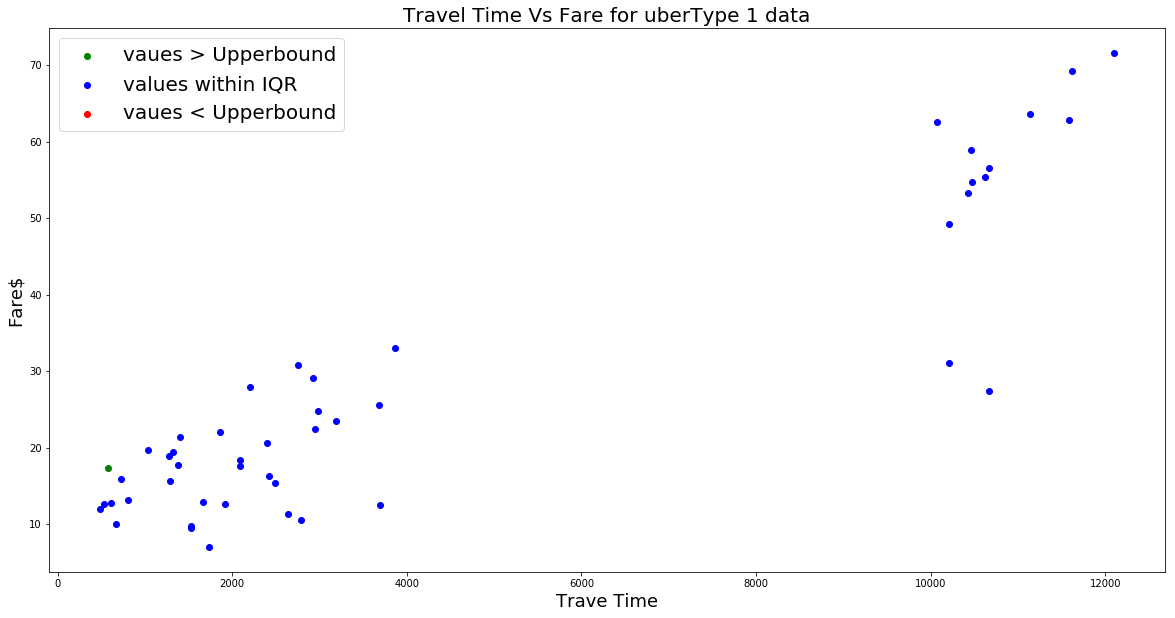

In [207]:
mean=outlierData['fare/time'][outlierData['Uber Type'] == 1].mean()
standardDeviation =outlierData['fare/time'][outlierData['Uber Type'] == 1].std()
lowerbound = mean-3*standardDeviation
upperbound = mean+3*standardDeviation

plt.figure(figsize=(20,10))
temp2 = outlierData[(outlierData['Uber Type'] == 1) & (outlierData['fare/time'] > upperbound)]
temp3 = outlierData[(outlierData['Uber Type'] == 1) & (outlierData['fare/time'] < upperbound) & (outlierData['fare/time'] > lowerbound)]
temp4 = outlierData[(outlierData['Uber Type'] == 1) & (outlierData['fare/time'] < lowerbound)]

plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='green' ,label = "vaues > Upperbound")
plt.scatter(temp3['Travel Time(s)'], temp3['Fare$'], color ='blue' ,label = "values within IQR")
plt.scatter(temp4['Travel Time(s)'], temp4['Fare$'], color ='red' ,label = "vaues < Upperbound")
plt.legend(fontsize = 20)

plt.xlabel('Trave Time', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare for uberType 1 data', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

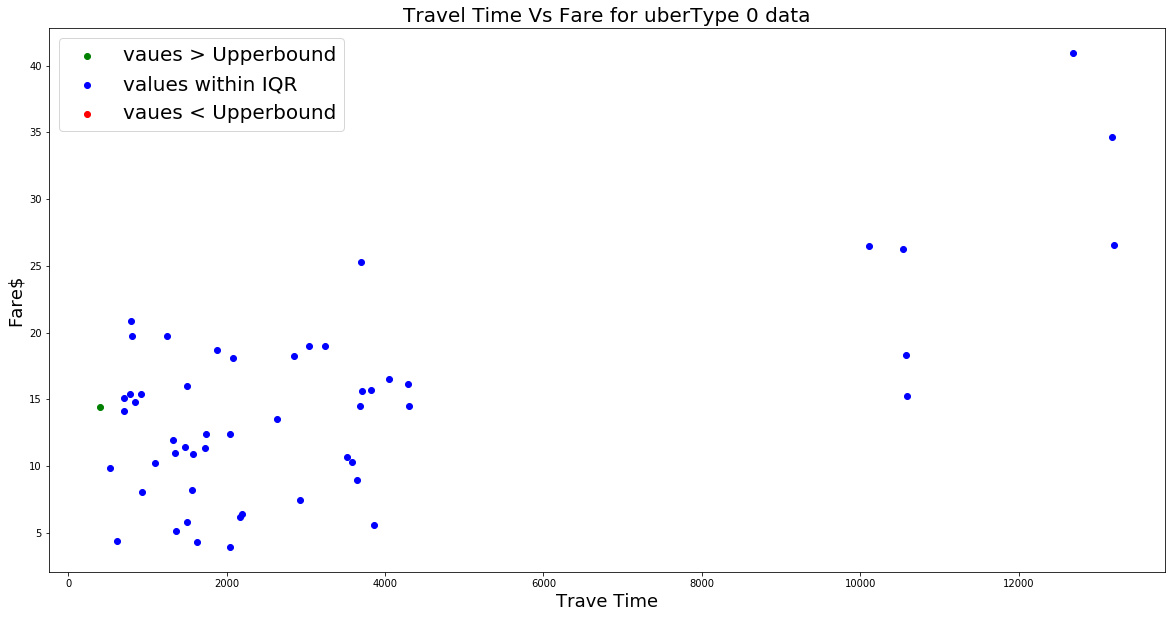

In [208]:
mean=outlierData['fare/time'][outlierData['Uber Type'] == 0].mean()
standardDeviation =outlierData['fare/time'][outlierData['Uber Type'] == 0].std()
lowerbound = mean-3*standardDeviation
upperbound = mean+3*standardDeviation

plt.figure(figsize=(20,10))
temp2 = outlierData[(outlierData['Uber Type'] == 0) & (outlierData['fare/time'] > upperbound)]
temp3 = outlierData[(outlierData['Uber Type'] == 0) & (outlierData['fare/time'] < upperbound) & (outlierData['fare/time'] > lowerbound)]
temp4 = outlierData[(outlierData['Uber Type'] == 0) & (outlierData['fare/time'] < lowerbound)]

plt.scatter(temp2['Travel Time(s)'], temp2['Fare$'], color ='green' ,label = "vaues > Upperbound")
plt.scatter(temp3['Travel Time(s)'], temp3['Fare$'], color ='blue' ,label = "values within IQR")
plt.scatter(temp4['Travel Time(s)'], temp4['Fare$'], color ='red' ,label = "vaues < Upperbound")
plt.legend(fontsize = 20)

plt.xlabel('Trave Time', fontsize=18)
plt.ylabel('Fare$', fontsize=18)
plt.title('Travel Time Vs Fare for uberType 0 data', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

In [209]:
outlierData.drop('fare/time',axis = 1,inplace=True)

None of these values looks like an outlier

So now lets try to detect the outlier using linear regression

For finding outliers we will use the cleaned dataset as the training set and using linear regression we will try to predict the values for the outlier data and check if there is any difference between both the values and if that difference is more than mean + 3 standard deviation or mean -3 standard deviation then it is an outlier

In [210]:
cleanedData.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,weekday,Time
0,ID3131303952,1,2,8,-37.820203,144.950883,-37.815834,145.046450,9025.0,2018-01-18,22:18:33,2605.14,23:01:58,25.40,1,2
1,ID1519026843,0,6,4,-37.773845,144.983689,-37.806914,144.998466,6199.0,2018-06-25,04:08:36,1338.30,4:30:54,11.24,1,0
2,ID3236083501,1,9,2,-38.110916,144.654173,-37.823241,144.937888,43061.0,2018-02-02,12:22:32,10410.12,15:16:02,55.60,1,2
3,ID5979102483,2,5,3,-37.816432,144.928439,-37.819126,144.981687,6068.0,2018-04-14,16:25:24,1402.98,16:48:46,141.42,0,2
4,ID1843939740,0,3,6,-37.822615,145.007229,-37.787442,144.980409,6049.0,2018-04-17,17:49:15,1528.44,18:14:43,8.84,1,2


In [211]:
outlierData.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID1259580071,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-04-26,10:07:16,13204.98,13:47:20,26.55
1,1,ID1963834956,0,2,6,-37.820953,144.947581,-37.773845,144.983689,6947.0,2018-02-17,14:01:43,1495.62,14:26:38,15.99
2,2,ID1960275819,0,7,6,-37.861835,144.905716,-37.787442,144.980409,11630.0,2018-07-05,18:57:54,3678.54,19:59:12,14.52
3,3,ID3563571562,1,5,9,-37.806046,144.931471,-38.110916,144.654173,43632.0,2018-04-28,18:39:12,10464.30,21:33:36,58.95
4,4,ID1775862328,0,5,7,-37.799510,144.935378,-37.861835,144.905716,12919.0,2018-07-04,18:13:41,4055.34,19:21:16,16.50


In [212]:
outlierData['weekday'] = outlierData['Departure Date'].apply(getWeekendOrWeekday)
outlierData['Time'] = outlierData['Departure Time'].apply(getTimeSection)

Now lets Split the outlier data based on the uber types

In [213]:
out0 = outlierData[outlierData['Uber Type'] == 0.0]
out1 = outlierData[outlierData['Uber Type'] == 1.0]
out2 = outlierData[outlierData['Uber Type'] == 2.0]

We know that while creating the model and trying to predict the values only numerical values can be applied . So removing all the columns with non numerical values


In [214]:
out0.drop(['Arrival Time','Departure Time','Departure Date','Uber Type'],axis=1,inplace = True)
out1.drop(['Arrival Time','Departure Time','Departure Date','Uber Type'],axis=1,inplace = True)
out2.drop(['Arrival Time','Departure Time','Departure Date','Uber Type'],axis=1,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [215]:
out0.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Travel Time(s)',
       'Fare$', 'weekday', 'Time'],
      dtype='object')

For training we will use the same training data that we used previously

In [216]:
lm_for_impute = LinearRegression() #instatiate

### uber Type 0

Now lets train the model based on our training data and try to predict the values of missing fare in missing data for uber type 0

In [217]:
train0.columns

Index(['Origin Region', 'Destination Region', 'Origin Latitude',
       'Origin Longitude', 'Destination Latitude', 'Destination Longitude',
       'Journey Distance(m)', 'Travel Time(s)', 'Fare$', 'weekday', 'Time'],
      dtype='object')

In [218]:
out0.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Travel Time(s)',
       'Fare$', 'weekday', 'Time'],
      dtype='object')

In [219]:
lm_for_impute.fit(train0[[x for x in train0.columns if x != 'Fare$']],train0['Fare$']) #fit
lm_for_impute.predict(out0.drop(['Fare$','Unnamed: 0','Unnamed: 0.1'],axis=1))

array([25.15918222, 12.05105144, 11.8430662 , 12.55394334, 12.98146432,
       12.89550091, 11.56380015, 10.23933967, 12.40909026, 20.20464728,
        9.26234925, 11.12202163,  8.14550593, 13.47323536,  9.44360824,
       27.96776725,  9.70975441, 16.08796044,  9.04138657,  6.99538004,
        9.65564245, 25.84796472, 13.10988568, 13.32253112,  9.09427894,
        9.58626397, 24.26373625, 11.52902235,  8.50312522, 12.71140112,
        8.23424022,  8.55038064, 11.23590929,  8.26572897, 10.44778805,
        7.89310413, 12.51962831, 10.74757278,  8.21008582, 12.67947686,
       21.78527952,  9.29092117, 12.94429557,  8.56927003, 10.95256045,
       16.80934207, 12.34181978, 12.95873775,  8.41319222,  7.93867125,
       20.76509756,  9.52117399, 13.34033329])

In [220]:
newOut0 = out0.copy()
newOut0['Fare$'] = lm_for_impute.predict(out0.drop(['Fare$','Unnamed: 0','Unnamed: 0.1'],axis=1)) 

now lets find the residual Difference of newOut0

In [221]:
newOut0['Fare$'] = out0['Fare$'] - newOut0['Fare$']

In [222]:
mean = newOut0['Fare$'].mean()
mean

2.0828581799056303

In [223]:
standardDeviation = newOut0['Fare$'].std()
standardDeviation

4.818704267600958

In [224]:
lowerBound = mean - 3*standardDeviation
upperBound = mean + 3*standardDeviation

In [225]:
newOut0[(newOut0['Fare$']< lowerBound) & (newOut0['Fare$']> upperBound)]

,Unnamed: 0,Unnamed: 0.1,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$,weekday,Time


Seems like there is no outliers for uber Type 0

### uber Type 1

Now lets train the model based on our training data and try to predict the values of missing fare in missing data for uber type 1

In [226]:
lm_for_impute.fit(train1[[x for x in train0.columns if x != 'Fare$']],train1['Fare$']) #fit
lm_for_impute.predict(out1.drop(['Fare$','Unnamed: 0','Unnamed: 0.1'],axis=1))

array([58.34039272, 16.23311688, 23.70142583, 60.14112939, 58.39252465,
       20.54490031, 16.10775688, 19.54692133, 20.08149819, 17.50362091,
       23.34056155, 18.14602037, 65.24112859, 18.92833879, 13.290143  ,
       11.38177558, 19.98592901, 56.54424181, 16.29243183, 58.44549717,
       12.35979922, 22.9573217 , 19.49899738, 22.0326107 , 64.65372592,
       21.35338783, 16.77374211, 20.90200122, 62.25533534, 14.12325347,
       18.48833194, 64.36917418, 11.74498439, 26.83127062, 56.66417576,
       57.50567589, 16.58096338, 15.5216445 , 22.88876952, 57.85438152,
       25.05565451, 56.56090989, 20.53534655, 27.8106282 , 21.87603407,
       14.21557454, 14.02427341, 21.24733663])

In [227]:
newOut1 = out1.copy()
newOut1['Fare$'] = lm_for_impute.predict(out1.drop(['Fare$','Unnamed: 0','Unnamed: 0.1'],axis=1)) 


now lets find the residual Difference of newOut1


In [228]:
newOut1['Fare$'] = out1['Fare$'] - newOut1['Fare$']


In [229]:
mean = newOut1['Fare$'].mean()
mean

-2.136972065895628

In [230]:
standardDeviation = newOut1['Fare$'].std()
standardDeviation

7.633713830317743

In [231]:
lowerBound = mean - 3*standardDeviation
upperBound = mean + 3*standardDeviation

In [232]:
newOut1[(newOut1['Fare$']< lowerBound) & (newOut1['Fare$']> upperBound)]

,Unnamed: 0,Unnamed: 0.1,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$,weekday,Time


Seems like there is no outliers for uber Type 0

### uber Type 2
Now lets train the model based on our training data and try to predict the values of missing fare in missing data for uber type 2


In [233]:
lm_for_impute.fit(train2[[x for x in train0.columns if x != 'Fare$']],train2['Fare$']) #fit
lm_for_impute.predict(out2.drop(['Fare$','Unnamed: 0','Unnamed: 0.1'],axis=1))


array([274.76639135, 913.6026698 , 125.7560486 ,  91.60001112,
       116.7017346 , 159.66912299, 106.08780684, 208.65921018,
       895.31722722, 304.01828482, 150.47036782])

In [234]:
newOut2 = out2.copy()
newOut2['Fare$'] = lm_for_impute.predict(out2.drop(['Fare$','Unnamed: 0','Unnamed: 0.1'],axis=1)) 


now lets find the residual Difference of newOut1


In [235]:
newOut2['Fare$'] = out2['Fare$'] - newOut2['Fare$']

In [236]:
newOut2['Fare$']

13    -32.156391
18    -58.582670
31    -12.466049
43      6.449989
51     -9.331735
59      7.100877
74     -3.717807
75      0.930790
76    -58.367227
99    -31.318285
109     7.629632
Name: Fare$, dtype: float64

In [237]:
mean = newOut2['Fare$'].mean()
mean

-16.71171593934846

In [238]:
standardDeviation = newOut2['Fare$'].std()
standardDeviation

24.877385574238314

In [239]:
lowerBound = mean - 3*standardDeviation
upperBound = mean + 3*standardDeviation

In [240]:
newOut2[(newOut2['Fare$']< lowerBound) & (newOut2['Fare$']> upperBound)]


,Unnamed: 0,Unnamed: 0.1,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$,weekday,Time


Seems like there is no outliers for uber Type 2

In [241]:
outlierData.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Uber Type', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance(m)',
       'Departure Date', 'Departure Time', 'Travel Time(s)', 'Arrival Time',
       'Fare$', 'weekday', 'Time'],
      dtype='object')

In [242]:
outlierData.drop(['weekday', 'Time'],axis = 1,inplace = True)

In [244]:
tempData = outlierData.copy()
tempData.set_index('Unnamed: 0',inplace=True)
tempData.rename(columns={'Unnamed: 0.1':'Unnamed: 0'}, inplace=True)
del tempData.index.name

In [245]:
tempData.to_csv(r'29566428_outliers_solution.csv')